


<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>

*   List item
*   List item


<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [3]:
# !gdown --id 1RmX5_q6D7rzoXD7nPUM_s8rKEf1KVMDi #training_text.zip download
# !gdown --id 1bSQrw5WmDqqI8hBcr8Pflzatx4xCT0Ex #training_variants.zip download

'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# !unzip training_text.zip

Archive:  training_text.zip
  inflating: training_text           


In [ ]:
# !unzip training_variants.zip

Archive:  training_variants.zip
  inflating: training_variants       


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [5]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [6]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

<h3>3.1.3. Preprocessing of text</h3>

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Mayank
[nltk_data]     Vyas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [10]:
#text processing stage.
start_time = time.process_time()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.process_time() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 57.359375 seconds


In [11]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas b lineag...

In [12]:
result[result.isnull().any(axis=1)]

ID    Gene             Variation  Class TEXT
1109  1109   FANCA                S1088F      1  NaN
1277  1277  ARID5B  Truncating Mutations      1  NaN
1407  1407   FGFR3                 K508M      6  NaN
1639  1639    FLT1         Amplification      6  NaN
2755  2755    BRAF                 G596C      7  NaN

In [13]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [14]:
result[result['ID']==1109]

ID   Gene Variation  Class          TEXT
1109  1109  FANCA    S1088F      1  FANCA S1088F

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [15]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [16]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

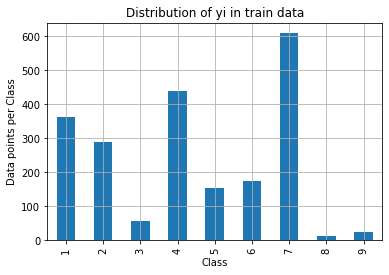

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


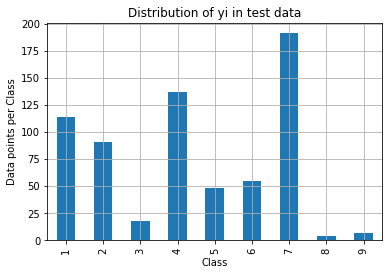

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


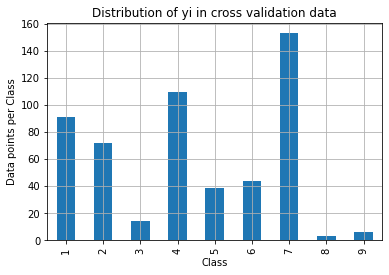

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [17]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [18]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4307425096975974
Log loss on Test Data using Random Model 2.4337918188497785
-------------------- Confusion matrix --------------------


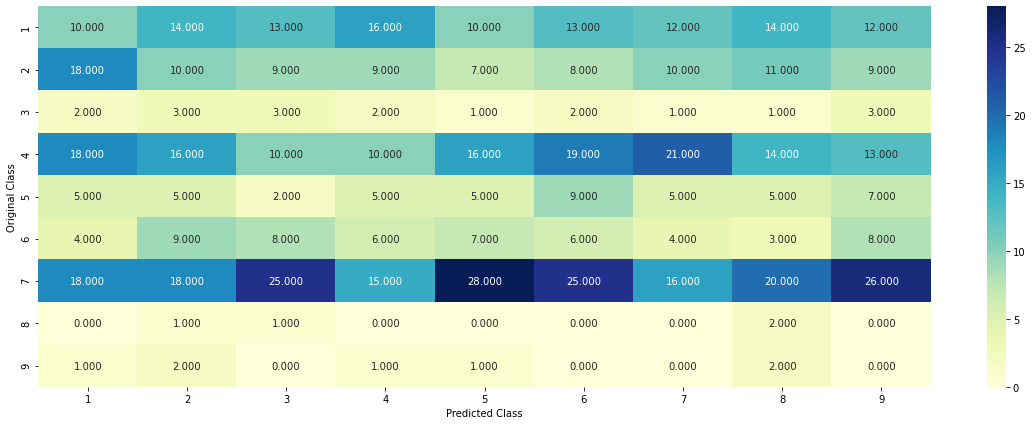

-------------------- Precision matrix (Columm Sum=1) --------------------


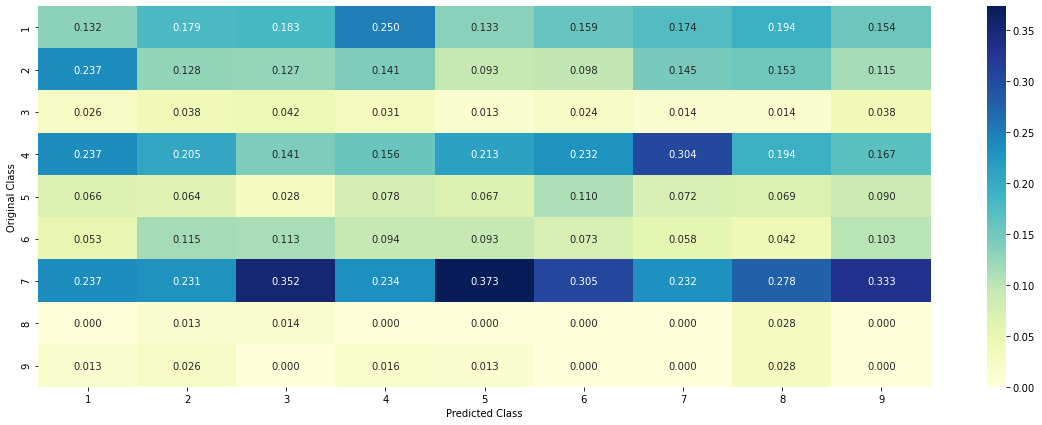

-------------------- Recall matrix (Row sum=1) --------------------


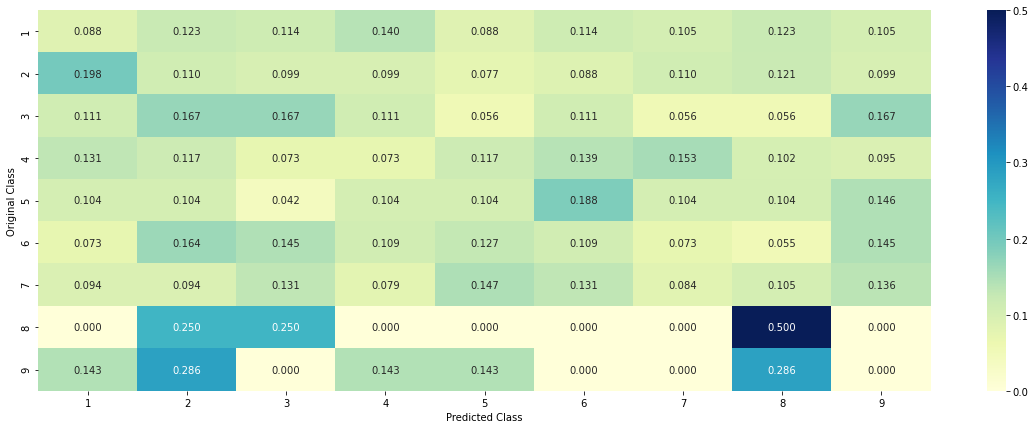

In [19]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [20]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [21]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 226
BRCA1     165
TP53       99
BRCA2      95
EGFR       86
PTEN       82
KIT        69
BRAF       65
ALK        49
CDKN2A     40
PDGFRA     39
Name: Gene, dtype: int64


In [22]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 226 different categories of genes in the train data, and they are distibuted as follows


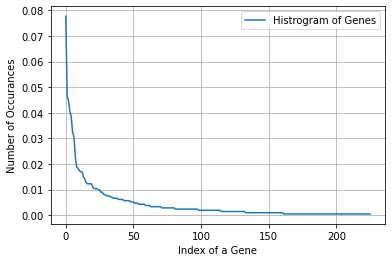

In [23]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


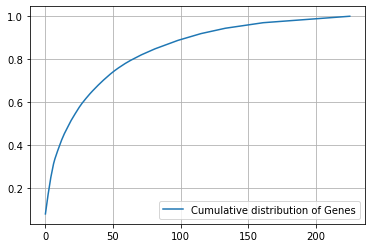

In [24]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [25]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [26]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [27]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [28]:
train_df['Gene'].head()

111      MSH6
1379    FGFR1
2160     PTEN
1457    FGFR2
2404      NF1
Name: Gene, dtype: object

In [29]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1b',
 'arid2',
 'arid5b',
 'asxl2',
 'atm',
 'atrx',
 'aurka',
 'axin1',
 'b2m',
 'bap1',
 'bcl10',
 'bcl2',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'epcam',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc4',
 'erg',
 'errfi1',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fanca',
 'fancc',
 'fat1',
 'fbxw7',
 'fgf3',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxl2',
 'fubp1',
 'gata3',
 'gli1',
 'gna11',
 'gnaq',
 'gnas',
 'h3f3a',
 'hist1h1c',
 'hla',
 'hnf1a',
 'hras',
 'idh1',
 'idh2',
 'igf1r',
 'ikzf1',
 'inpp4b',
 'jak1',
 'jak2',
 'jun

In [30]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 226)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.1989726245206285
For values of alpha =  0.0001 The log loss is: 1.176312420271912
For values of alpha =  0.001 The log loss is: 1.2247336553445618
For values of alpha =  0.01 The log loss is: 1.3611902471997224
For values of alpha =  0.1 The log loss is: 1.4555295924584322
For values of alpha =  1 The log loss is: 1.4844770468805462


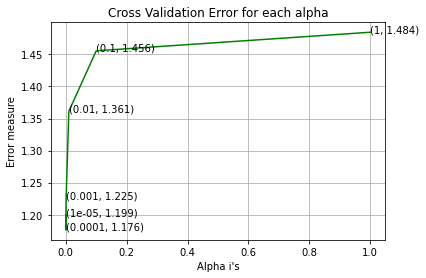

For values of best alpha =  0.0001 The train log loss is: 0.9848380215938437
For values of best alpha =  0.0001 The cross validation log loss is: 1.176312420271912
For values of best alpha =  0.0001 The test log loss is: 1.21417456138971


In [31]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [32]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  226  genes in train dataset?
Ans
1. In test data 639 out of 665 : 96.09022556390977
2. In cross validation data 515 out of  532 : 96.80451127819549


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [33]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1940
Truncating_Mutations    57
Deletion                51
Amplification           32
Fusions                 25
Overexpression           4
G12V                     3
Q61R                     3
G35R                     2
ETV6-NTRK3_Fusion        2
G12C                     2
Name: Variation, dtype: int64


In [34]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1940 different categories of variations in the train data, and they are distibuted as follows


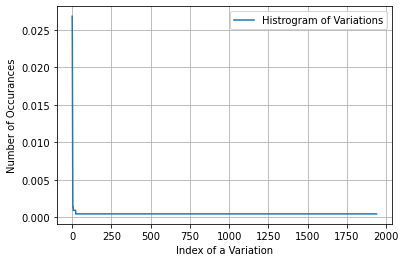

In [35]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02683616 0.05084746 0.06591337 ... 0.99905838 0.99952919 1.        ]


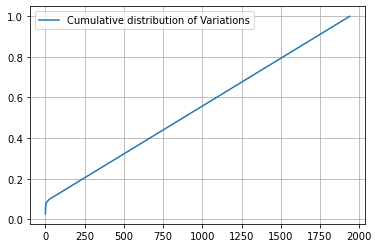

In [36]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [37]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [38]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [39]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [40]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1975)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7189404248870772
For values of alpha =  0.0001 The log loss is: 1.7185807613665884
For values of alpha =  0.001 The log loss is: 1.7180332155440516
For values of alpha =  0.01 The log loss is: 1.728564208815044
For values of alpha =  0.1 The log loss is: 1.7325601364209404
For values of alpha =  1 The log loss is: 1.733728898741734


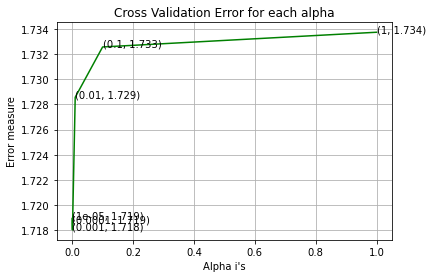

For values of best alpha =  0.001 The train log loss is: 0.9713737200850372
For values of best alpha =  0.001 The cross validation log loss is: 1.7180332155440516
For values of best alpha =  0.001 The test log loss is: 1.6882053229126692


In [41]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [42]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1940  genes in test and cross validation data sets?
Ans
1. In test data 90 out of 665 : 13.533834586466165
2. In cross validation data 43 out of  532 : 8.082706766917292


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [43]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [44]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [45]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 52325


In [46]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [47]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [48]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [49]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [50]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [51]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({3: 4925, 4: 3709, 5: 3048, 6: 2477, 7: 1879, 9: 1849, 8: 1804, 10: 1690, 12: 1310, 16: 1092, 11: 1029, 18: 922, 13: 871, 14: 778, 15: 705, 17: 626, 20: 594, 21: 559, 19: 549, 22: 462, 24: 433, 28: 392, 23: 373, 48: 360, 27: 360, 26: 348, 30: 341, 25: 338, 32: 316, 36: 301, 33: 289, 47: 264, 29: 261, 34: 245, 31: 244, 39: 234, 35: 232, 40: 228, 42: 218, 41: 215, 38: 210, 49: 187, 37: 185, 45: 177, 56: 166, 60: 160, 43: 155, 44: 154, 52: 146, 46: 144, 51: 141, 50: 136, 59: 129, 55: 129, 54: 128, 57: 120, 66: 112, 72: 111, 58: 110, 70: 109, 61: 108, 65: 106, 62: 105, 53: 104, 68: 103, 64: 102, 67: 99, 63: 98, 69: 92, 80: 91, 82: 90, 73: 84, 75: 83, 84: 81, 71: 80, 79: 75, 86: 74, 76: 74, 98: 71, 96: 71, 85: 71, 81: 71, 78: 71, 94: 69, 88: 68, 83: 68, 89: 67, 105: 66, 92: 65, 91: 65, 90: 64, 74: 64, 93: 63, 77: 60, 87: 59, 102: 55, 101: 55, 109: 54, 100: 54, 95: 54, 112: 53, 115: 52, 103: 50, 130: 49, 120: 49, 108: 49, 106: 49, 104: 49, 97: 49, 99: 48, 107: 47, 123: 46, 132: 45, 1

For values of alpha =  1e-05 The log loss is: 1.2841920473519335
For values of alpha =  0.0001 The log loss is: 1.196102160442999
For values of alpha =  0.001 The log loss is: 1.205315899786345
For values of alpha =  0.01 The log loss is: 1.3449597903976742
For values of alpha =  0.1 The log loss is: 1.5334143648765404
For values of alpha =  1 The log loss is: 1.7015234302863773


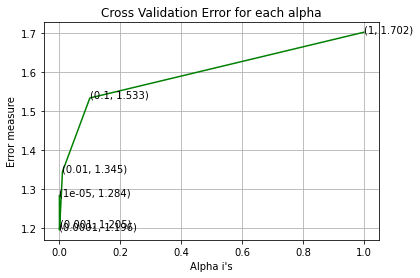

For values of best alpha =  0.0001 The train log loss is: 0.65267276417429
For values of best alpha =  0.0001 The cross validation log loss is: 1.196102160442999
For values of best alpha =  0.0001 The test log loss is: 1.1899412720474414


In [52]:
# Train a Logistic regression+Calibration model using text features which are on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [53]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [54]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

96.264 % of word of test data appeared in train data
97.77 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [55]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [56]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [57]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [58]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [59]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 54526)
(number of data points * number of features) in test data =  (665, 54526)
(number of data points * number of features) in cross validation data = (532, 54526)


In [60]:

train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [61]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.2613720050818436
for alpha = 0.0001
Log Loss : 1.260435140938913
for alpha = 0.001
Log Loss : 1.2578539330562992
for alpha = 0.1
Log Loss : 1.2635120862837688
for alpha = 1
Log Loss : 1.2974476343311674
for alpha = 10
Log Loss : 1.4049479422635982
for alpha = 100
Log Loss : 1.4370584169263154
for alpha = 1000
Log Loss : 1.3807244080442929


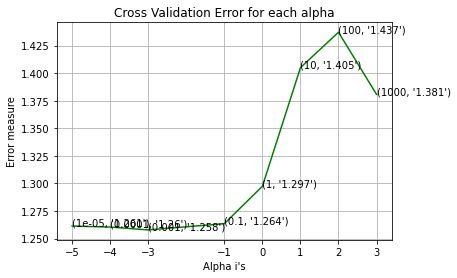

For values of best alpha =  0.001 The train log loss is: 0.8155047174956959
For values of best alpha =  0.001 The cross validation log loss is: 1.2578539330562992
For values of best alpha =  0.001 The test log loss is: 1.2664405990839795


In [62]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.2578539330562992
Number of missclassified point : 0.3966165413533835
-------------------- Confusion matrix --------------------


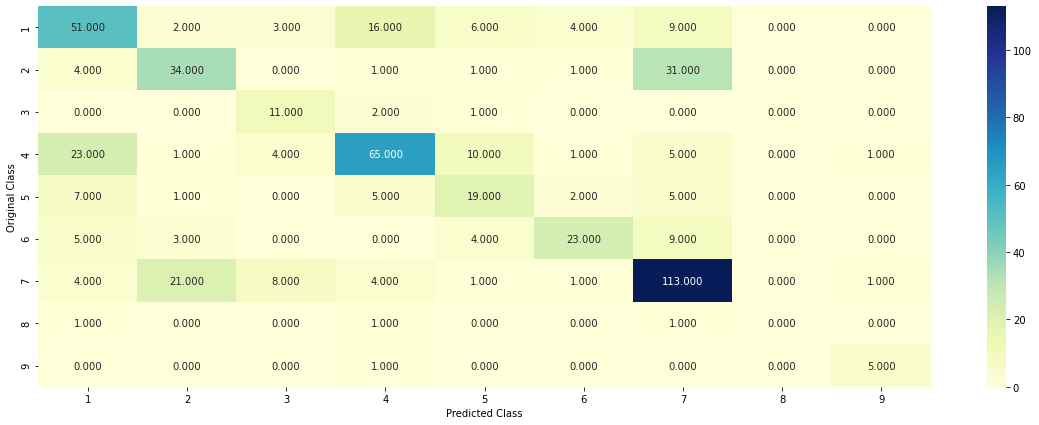

-------------------- Precision matrix (Columm Sum=1) --------------------


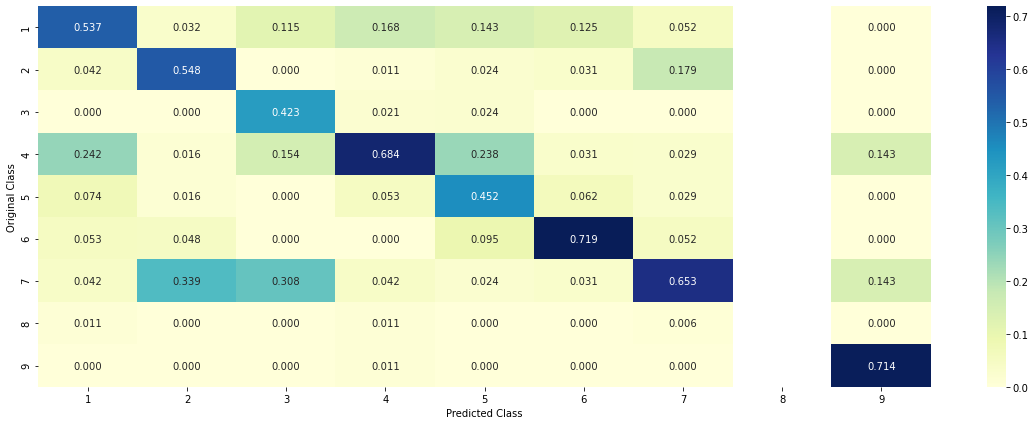

-------------------- Recall matrix (Row sum=1) --------------------


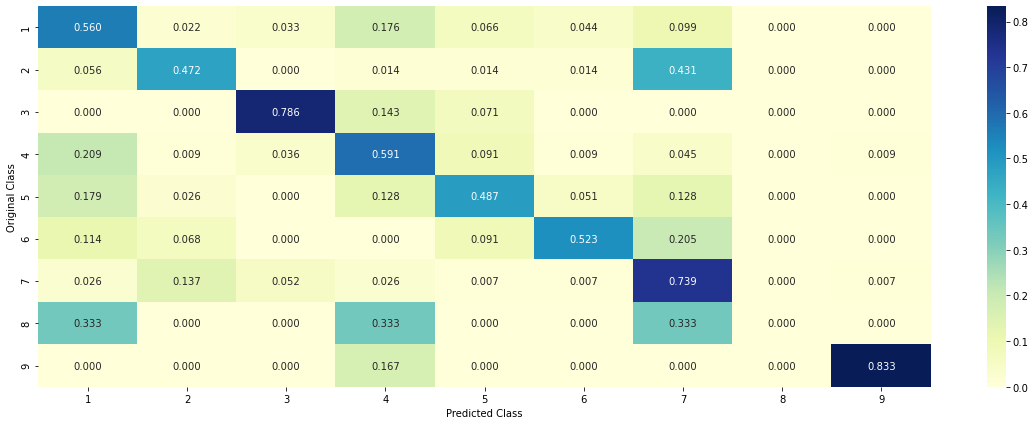

In [63]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [64]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices=np.argsort(-1*clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0812 0.0735 0.0113 0.0932 0.0341 0.6054 0.0918 0.0051 0.0044]]
Actual Class : 6
--------------------------------------------------
Out of the top  100  features  0 are present in query point


In [65]:
test_df['TEXT'].iloc[test_point_index]

'myeloproliferative neoplasms mpns group hematologic malignancies include ph chronic myeloid leukemia cml ph diseases includes primary myelofibrosis mf polycythemia vera pv essential thrombocythemia et discovery constitutive abl kinase activity sufficient necessary cause cml laid foundation development imatinib target directed therapy1 2 clinical success bcr abl inhibitors treatment cml revolutionized anti kinase therapy also enforced idea identify genetic lesions neoplastic diseases therapeutic targeting2 3 4 2005 four groups reported kinase activating mutations jak2 jak2 v617f bcr abl negative mpn patients5 6 7 8 discovery generated great interest treating mpns targeting jak2 small molecule kinase inhibitors jak2 cytosolic tyrosine kinase activated cytokine mediated receptor dimerization resulting phosphorylation stats required cell proliferation survival myeloid development well initial stages immune response9 constitutive jak2 signaling implicated many cancers myeloid malignancies 

In [66]:
no_feature

100

In [67]:
test_df['Gene'].iloc[test_point_index]

'JAK2'

In [68]:
test_df['Variation'].iloc[test_point_index]

'I1018F'

In [69]:
clf.coef_.shape

(9, 54526)

In [70]:
indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
indices[0]

array([    0, 32636, 32637, 32638, 32641, 32644, 32646, 32647, 32648,
       32652, 32653, 32655, 32656, 32657, 32658, 32659, 32661, 32662,
       32635, 32634, 32633, 32632, 32611, 32613, 32614, 32615, 32616,
       32619, 32620, 32621, 32663, 32622, 32624, 32625, 32626, 32627,
       32628, 32629, 32630, 32631, 32623, 32610, 32664, 32668, 32703,
       32705, 32706, 32707, 32708, 32709, 32712, 32714, 32715, 32716,
       32721, 32723, 32724, 32725, 32728, 32729, 32731, 32702, 32700,
       32699, 32698, 32669, 32670, 32671, 32676, 32677, 32678, 32681,
       32683, 32665, 32684, 32688, 32689, 32690, 32691, 32692, 32693,
       32694, 32696, 32685, 32732, 32607, 32605, 32512, 32513, 32514,
       32517, 32518, 32520, 32522, 32523, 32524, 32526, 32527, 32530,
       32532], dtype=int64)

In [71]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [72]:
for i in range(10):
  test_point_index = i
  no_feature = 100
  predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
  print("Predicted Class :", predicted_cls[0])
  print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
  print("Actual Class :", test_y[test_point_index])
  indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
  print("-"*50)
  get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index].lower(),test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0894 0.0809 0.0123 0.1027 0.0376 0.0317 0.6348 0.0057 0.0048]]
Actual Class : 7
--------------------------------------------------
Out of the top  100  features  0 are present in query point
Predicted Class : 6
Predicted Class Probabilities: [[0.0812 0.0735 0.0113 0.0932 0.0341 0.6054 0.0918 0.0051 0.0044]]
Actual Class : 6
--------------------------------------------------
Out of the top  100  features  0 are present in query point
Predicted Class : 7
Predicted Class Probabilities: [[0.0931 0.0846 0.0953 0.1069 0.0394 0.0331 0.5368 0.0059 0.005 ]]
Actual Class : 2
--------------------------------------------------
Out of the top  100  features  0 are present in query point
Predicted Class : 4
Predicted Class Probabilities: [[0.0834 0.0753 0.0116 0.6624 0.0348 0.0294 0.0932 0.0053 0.0046]]
Actual Class : 4
--------------------------------------------------
Out of the top  100  features  0 are present in query point
Predicted Class 

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [73]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 3
Predicted Class Probabilities: [[0.1122 0.1005 0.3224 0.2407 0.0462 0.0392 0.1253 0.0072 0.0062]]
Actual Class : 1
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.033563900846213
for alpha = 11
Log Loss : 1.035117828241571
for alpha = 15
Log Loss : 1.0493273640253709
for alpha = 21
Log Loss : 1.0664054727197423
for alpha = 31
Log Loss : 1.0799136454277487
for alpha = 41
Log Loss : 1.0814038959427565
for alpha = 51
Log Loss : 1.0948436663546879
for alpha = 99
Log Loss : 1.1164040819054177


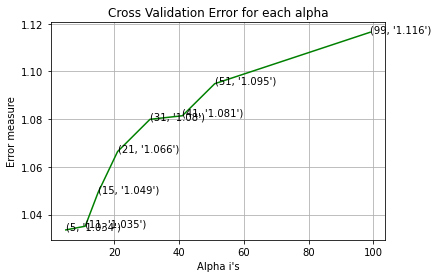

For values of best alpha =  5 The train log loss is: 0.46377361319798743
For values of best alpha =  5 The cross validation log loss is: 1.033563900846213
For values of best alpha =  5 The test log loss is: 1.0891177485057852


In [74]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.033563900846213
Number of mis-classified points : 0.35902255639097747
-------------------- Confusion matrix --------------------


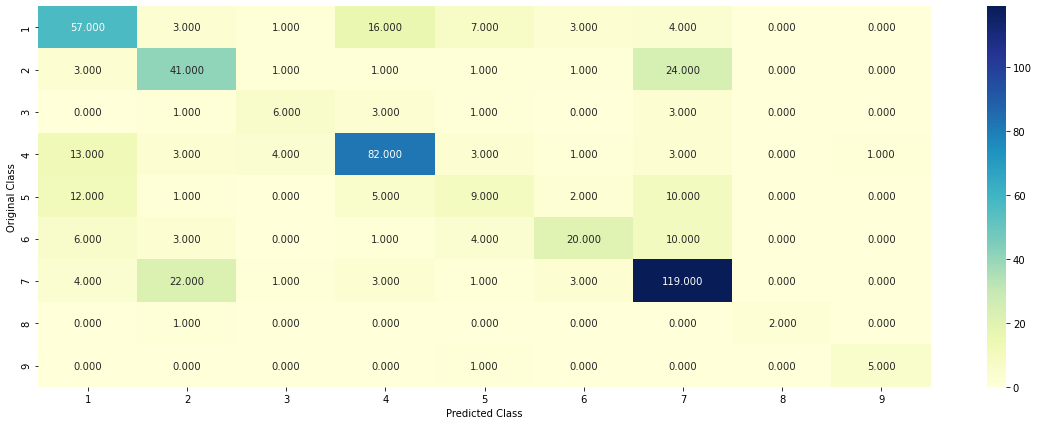

-------------------- Precision matrix (Columm Sum=1) --------------------


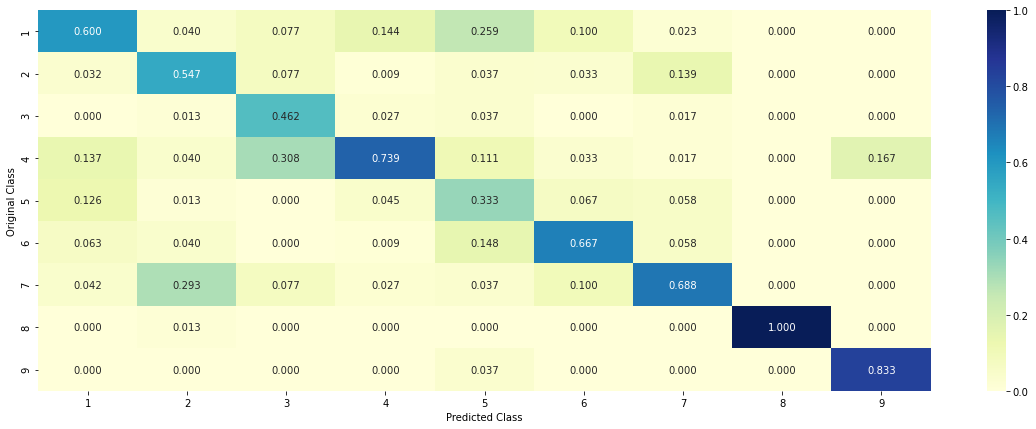

-------------------- Recall matrix (Row sum=1) --------------------


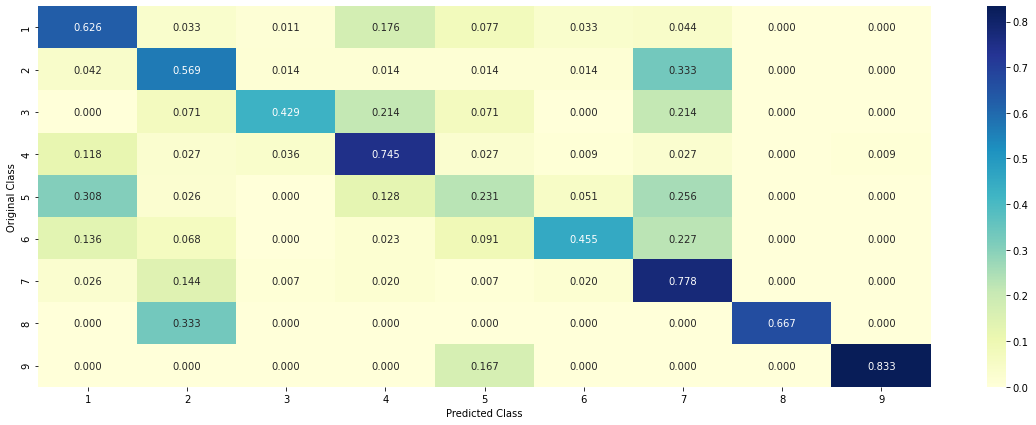

In [75]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [76]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 6
The  5  nearest neighbours of the test points belongs to classes [6 6 6 6 6]
Fequency of nearest points : Counter({6: 5})


<h3>4.2.4. Sample Query Point-2 </h3>

In [77]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 4
Actual Class : 1
the k value for knn is 5 and the nearest neighbours of the test points belongs to classes [4 4 3 3 4]
Fequency of nearest points : Counter({4: 3, 3: 2})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.3276907649524154
for alpha = 1e-05
Log Loss : 1.3104553310563956
for alpha = 0.0001
Log Loss : 1.1458096702991662
for alpha = 0.001
Log Loss : 1.1409735676713961
for alpha = 0.01
Log Loss : 1.2637638240609312
for alpha = 0.1
Log Loss : 1.543473314769894
for alpha = 1
Log Loss : 1.7399844714882784
for alpha = 10
Log Loss : 1.762507732215891
for alpha = 100
Log Loss : 1.764824921171885


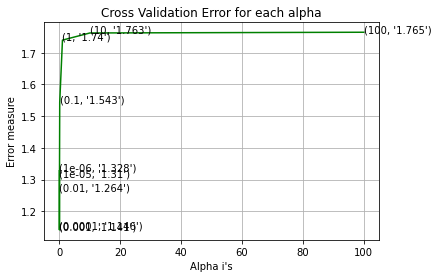

For values of best alpha =  0.001 The train log loss is: 0.5148099352480917
For values of best alpha =  0.001 The cross validation log loss is: 1.1409735676713961
For values of best alpha =  0.001 The test log loss is: 1.1267675309624652


In [78]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.1409735676713961
Number of mis-classified points : 0.34398496240601506
-------------------- Confusion matrix --------------------


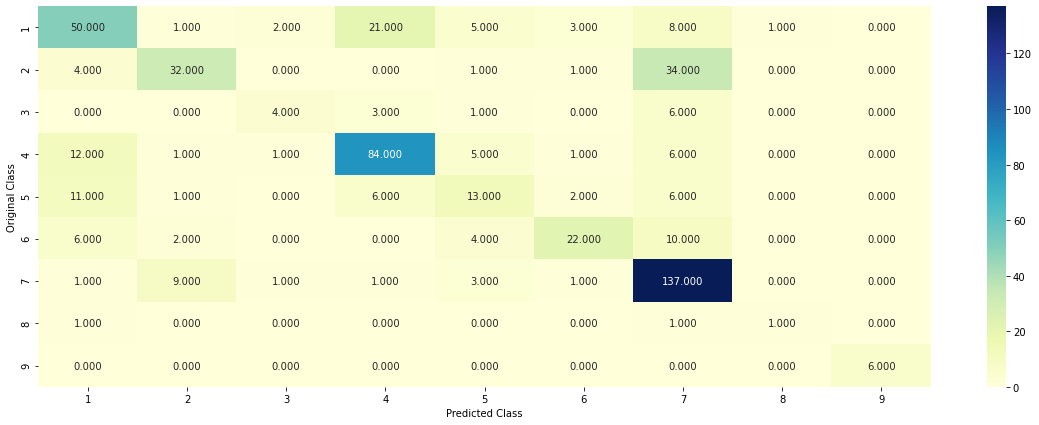

-------------------- Precision matrix (Columm Sum=1) --------------------


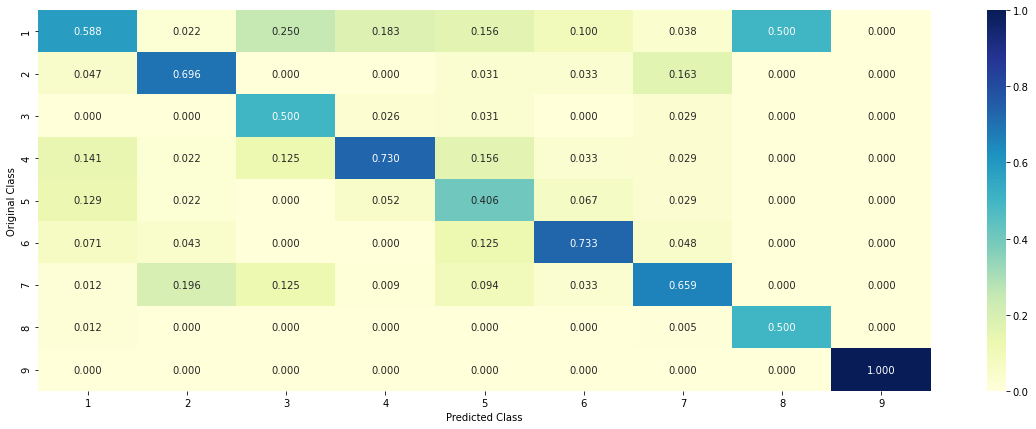

-------------------- Recall matrix (Row sum=1) --------------------


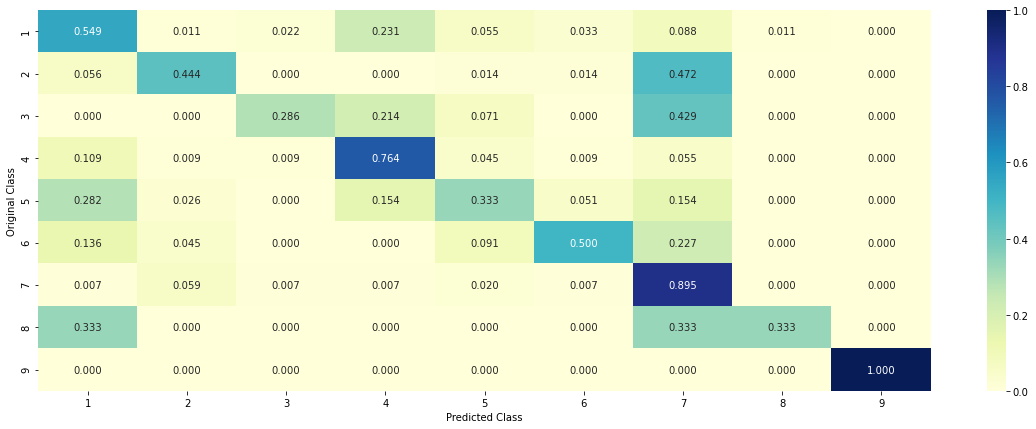

In [79]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [80]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most important of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [81]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.005  0.0125 0.0024 0.0052 0.0054 0.9508 0.0109 0.0055 0.0021]]
Actual Class : 6
--------------------------------------------------
361 Text feature [similarly] present in test data point [True]
388 Text feature [3a] present in test data point [True]
394 Text feature [weakened] present in test data point [True]
411 Text feature [mutants] present in test data point [True]
430 Text feature [anti] present in test data point [True]
434 Text feature [detected] present in test data point [True]
440 Text feature [3b] present in test data point [True]
441 Text feature [previously] present in test data point [True]
452 Text feature [sequenced] present in test data point [True]
461 Text feature [described] present in test data point [True]
475 Text feature [influence] present in test data point [True]
478 Text feature [presence] present in test data point [True]
485 Text feature [4a] present in test data point [True]
495 Text feature [assays]

<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [82]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1096 0.0306 0.3106 0.4905 0.0159 0.0117 0.0207 0.0055 0.0049]]
Actual Class : 1
--------------------------------------------------
166 Text feature [suppressor] present in test data point [True]
216 Text feature [novel] present in test data point [True]
326 Text feature [sequencing] present in test data point [True]
342 Text feature [harboring] present in test data point [True]
401 Text feature [screening] present in test data point [True]
406 Text feature [e285v] present in test data point [True]
Out of the top  500  features  6 are present in query point


<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.308838482432912
for alpha = 1e-05
Log Loss : 1.2631765261115435
for alpha = 0.0001
Log Loss : 1.1629531267216544
for alpha = 0.001
Log Loss : 1.158246385239081
for alpha = 0.01
Log Loss : 1.2977160230411868
for alpha = 0.1
Log Loss : 1.4678820443288125
for alpha = 1
Log Loss : 1.6630339510465988


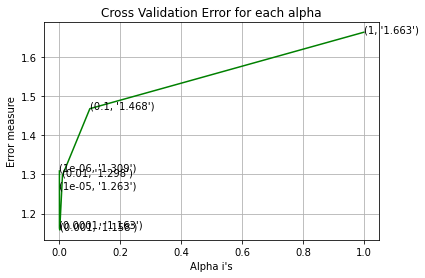

For values of best alpha =  0.001 The train log loss is: 0.5129131792400149
For values of best alpha =  0.001 The cross validation log loss is: 1.158246385239081
For values of best alpha =  0.001 The test log loss is: 1.1272780664411108


In [83]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.158246385239081
Number of mis-classified points : 0.34962406015037595
-------------------- Confusion matrix --------------------


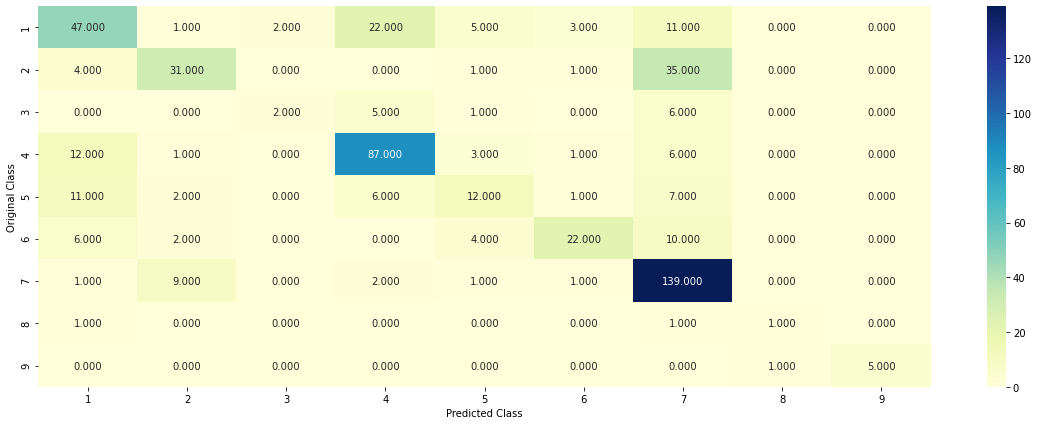

-------------------- Precision matrix (Columm Sum=1) --------------------


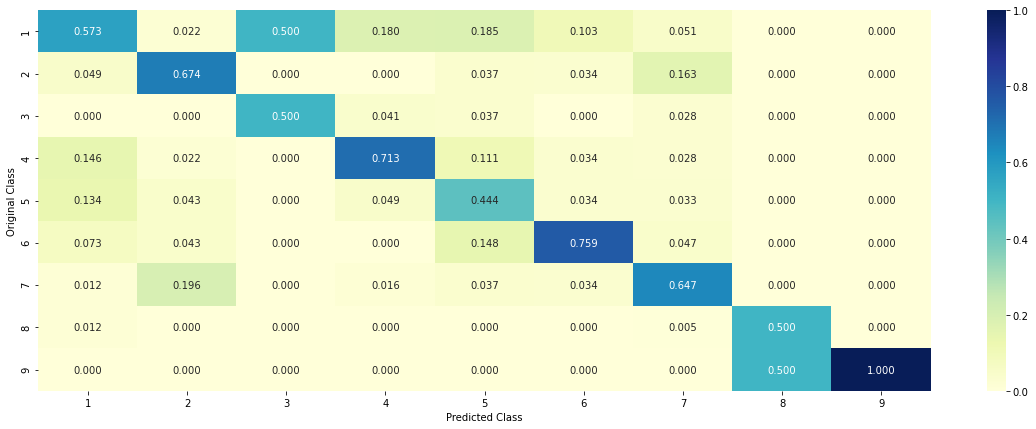

-------------------- Recall matrix (Row sum=1) --------------------


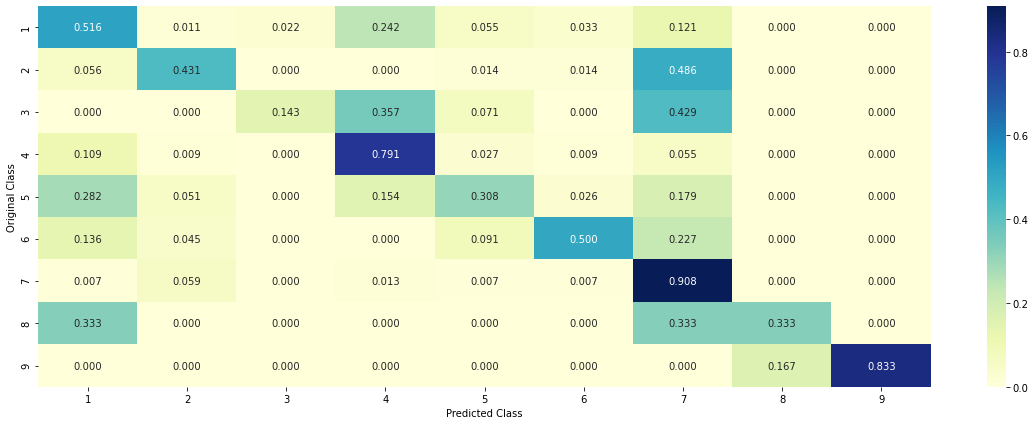

In [84]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [85]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0056 0.0134 0.0021 0.006  0.0053 0.9458 0.0146 0.0045 0.0027]]
Actual Class : 6
--------------------------------------------------
322 Text feature [similarly] present in test data point [True]
342 Text feature [3a] present in test data point [True]
358 Text feature [mutants] present in test data point [True]
368 Text feature [previously] present in test data point [True]
373 Text feature [detected] present in test data point [True]
387 Text feature [anti] present in test data point [True]
391 Text feature [weakened] present in test data point [True]
392 Text feature [sequenced] present in test data point [True]
393 Text feature [3b] present in test data point [True]
399 Text feature [described] present in test data point [True]
418 Text feature [presence] present in test data point [True]
444 Text feature [influence] present in test data point [True]
457 Text feature [assays] present in test data point [True]
458 Text feature [4a]

<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [86]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1214 0.0356 0.2029 0.5732 0.0184 0.0125 0.0257 0.0056 0.0046]]
Actual Class : 1
--------------------------------------------------
234 Text feature [suppressor] present in test data point [True]
365 Text feature [novel] present in test data point [True]
398 Text feature [e285v] present in test data point [True]
Out of the top  500  features  3 are present in query point


<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.3202276216006241
for C = 0.0001
Log Loss : 1.2223926610774971
for C = 0.001
Log Loss : 1.1208529811419616
for C = 0.01
Log Loss : 1.1729271299794992
for C = 0.1
Log Loss : 1.408081610328034
for C = 1
Log Loss : 1.7514392521408042
for C = 10
Log Loss : 1.7651554353095893
for C = 100
Log Loss : 1.7651554577221404


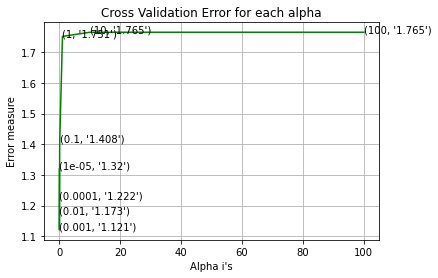

For values of best alpha =  0.001 The train log loss is: 0.5229248534500784
For values of best alpha =  0.001 The cross validation log loss is: 1.1208529811419616
For values of best alpha =  0.001 The test log loss is: 1.1683468540596313


In [87]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.1208529811419616
Number of mis-classified points : 0.34210526315789475
-------------------- Confusion matrix --------------------


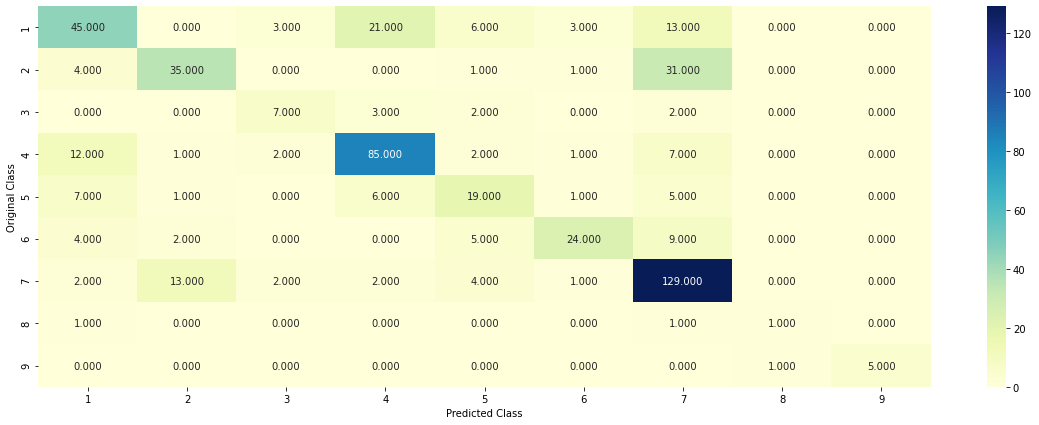

-------------------- Precision matrix (Columm Sum=1) --------------------


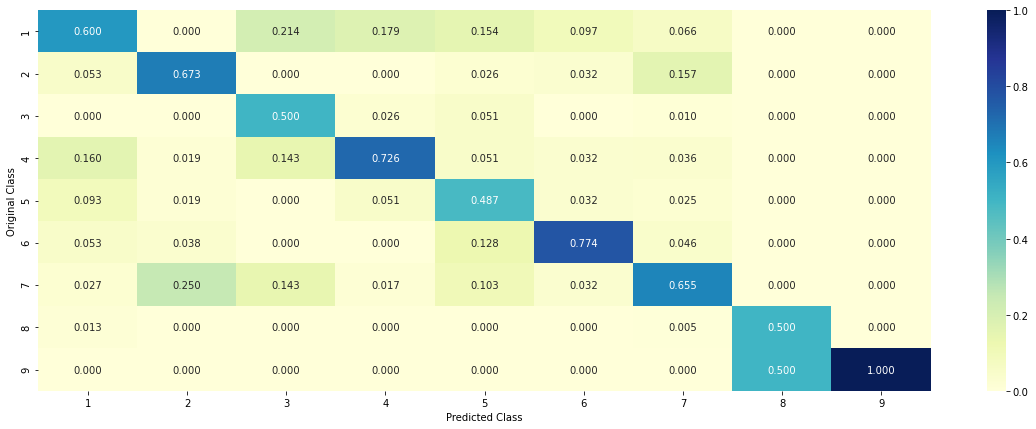

-------------------- Recall matrix (Row sum=1) --------------------


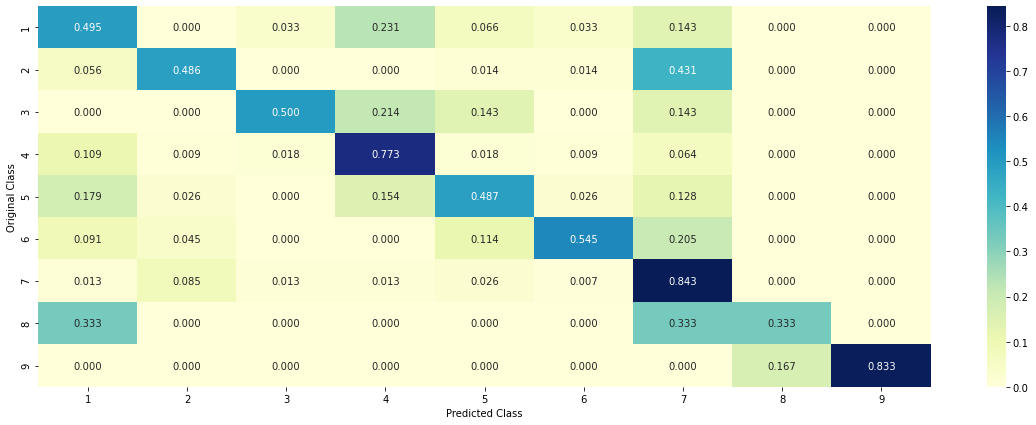

In [88]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [89]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.034  0.0327 0.0119 0.0229 0.0267 0.788  0.0735 0.0051 0.0052]]
Actual Class : 6
--------------------------------------------------
Out of the top  500  features  0 are present in query point


<h4>4.3.3.2. For Incorrectly classified point</h4>

In [90]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 3
Predicted Class Probabilities: [[0.0984 0.0689 0.3481 0.2886 0.0495 0.0269 0.1061 0.0063 0.0071]]
Actual Class : 1
--------------------------------------------------
220 Text feature [e285v] present in test data point [True]
Out of the top  500  features  1 are present in query point


<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [91]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2641103794814434
for n_estimators = 100 and max depth =  10
Log Loss : 1.1675399476529758
for n_estimators = 200 and max depth =  5
Log Loss : 1.2561385447368387
for n_estimators = 200 and max depth =  10
Log Loss : 1.1560998084298286
for n_estimators = 500 and max depth =  5
Log Loss : 1.2449318730378824
for n_estimators = 500 and max depth =  10
Log Loss : 1.152707133258773
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2449207793123083
for n_estimators = 1000 and max depth =  10
Log Loss : 1.1493221435221168
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2384915508828327
for n_estimators = 2000 and max depth =  10
Log Loss : 1.1445567533551881
For values of best estimator =  2000 The train log loss is: 0.680291095600069
For values of best estimator =  2000 The cross validation log loss is: 1.1445567533551881
For values of best estimator =  2000 The test log loss is: 1.1722741887760435


<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.1445567533551881
Number of mis-classified points : 0.3890977443609023
-------------------- Confusion matrix --------------------


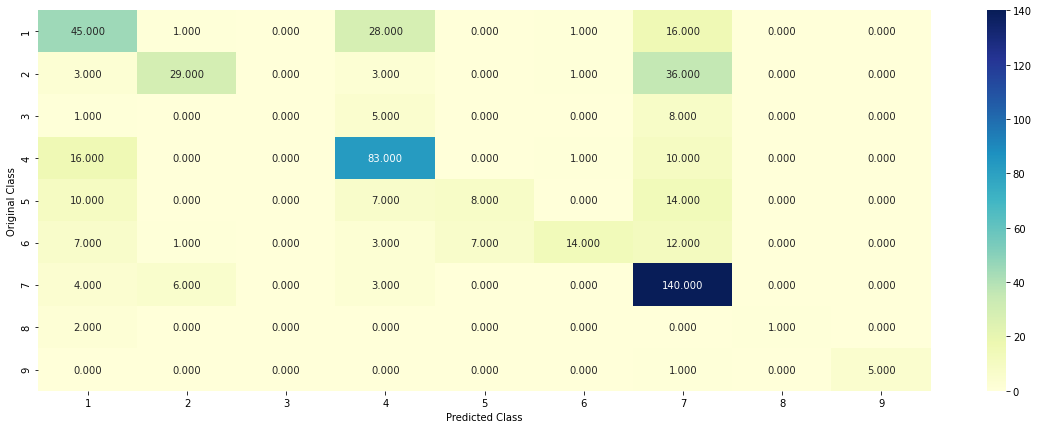

-------------------- Precision matrix (Columm Sum=1) --------------------


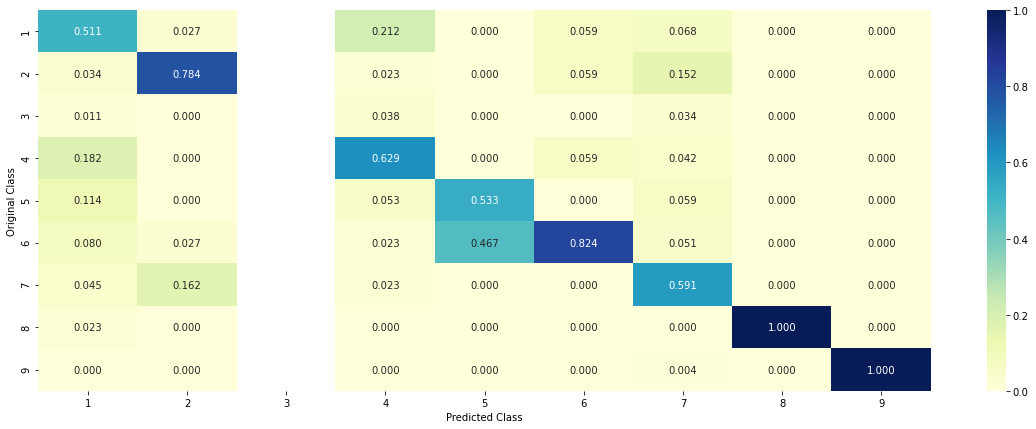

-------------------- Recall matrix (Row sum=1) --------------------


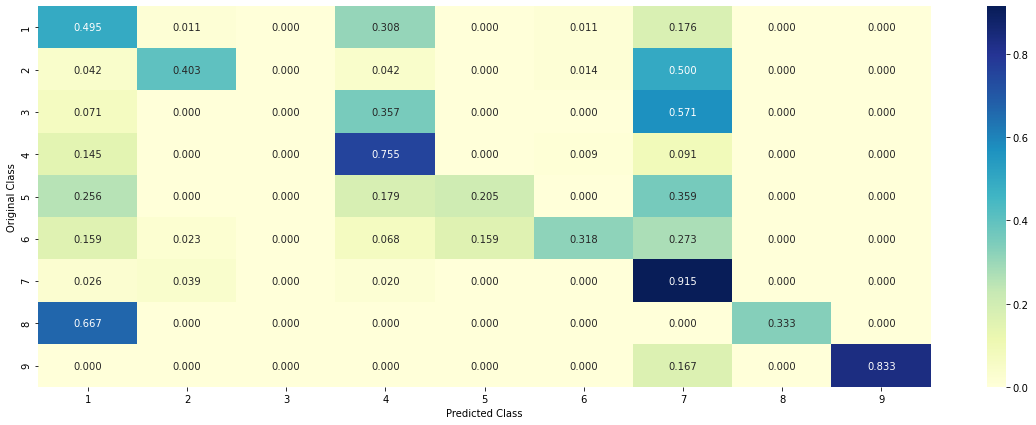

In [92]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [93]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0297 0.0244 0.0149 0.0214 0.0339 0.8104 0.0575 0.0033 0.0047]]
Actual Class : 6
--------------------------------------------------
0 Text feature [activating] present in test data point [True]
1 Text feature [kinase] present in test data point [True]
3 Text feature [tyrosine] present in test data point [True]
4 Text feature [activated] present in test data point [True]
5 Text feature [activation] present in test data point [True]
6 Text feature [inhibitors] present in test data point [True]
7 Text feature [signaling] present in test data point [True]
8 Text feature [inhibitor] present in test data point [True]
10 Text feature [phosphorylation] present in test data point [True]
11 Text feature [constitutive] present in test data point [True]
13 Text feature [oncogenic] present in test data point [True]
14 Text feature [constitutively] present in test data point [True]
17 Text feature [treatment] present in test data point [True]
21 

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [94]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2094 0.0553 0.046  0.5301 0.0536 0.0447 0.0458 0.0062 0.0089]]
Actuall Class : 1
--------------------------------------------------
7 Text feature [signaling] present in test data point [True]
9 Text feature [suppressor] present in test data point [True]
12 Text feature [function] present in test data point [True]
15 Text feature [nonsense] present in test data point [True]
17 Text feature [treatment] present in test data point [True]
24 Text feature [functional] present in test data point [True]
25 Text feature [loss] present in test data point [True]
26 Text feature [lines] present in test data point [True]
30 Text feature [cells] present in test data point [True]
31 Text feature [patients] present in test data point [True]
42 Text feature [variants] present in test data point [True]
49 Text feature [cell] present in test data point [True]
56 Text feature [protein] present in test data point [True]
58 Text feature [expressing] pr

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [95]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 2.1848032077290926
for n_estimators = 10 and max depth =  3
Log Loss : 1.794772698274222
for n_estimators = 10 and max depth =  5
Log Loss : 1.4519846416276638
for n_estimators = 10 and max depth =  10
Log Loss : 1.6486018373371603
for n_estimators = 50 and max depth =  2
Log Loss : 1.8352957732396555
for n_estimators = 50 and max depth =  3
Log Loss : 1.5479223385512502
for n_estimators = 50 and max depth =  5
Log Loss : 1.4659465129849216
for n_estimators = 50 and max depth =  10
Log Loss : 1.719138005422236
for n_estimators = 100 and max depth =  2
Log Loss : 1.6786467670441085
for n_estimators = 100 and max depth =  3
Log Loss : 1.5573469217206455
for n_estimators = 100 and max depth =  5
Log Loss : 1.3982198063936806
for n_estimators = 100 and max depth =  10
Log Loss : 1.6973875416795319
for n_estimators = 200 and max depth =  2
Log Loss : 1.7135233963771241
for n_estimators = 200 and max depth =  3
Log Loss : 1.553840855685719


<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.3982198063936806
Number of mis-classified points : 0.4849624060150376
-------------------- Confusion matrix --------------------


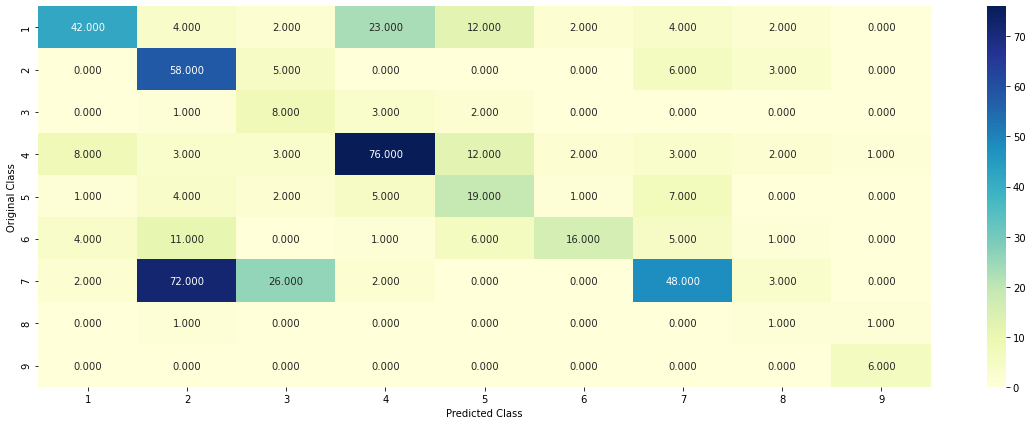

-------------------- Precision matrix (Columm Sum=1) --------------------


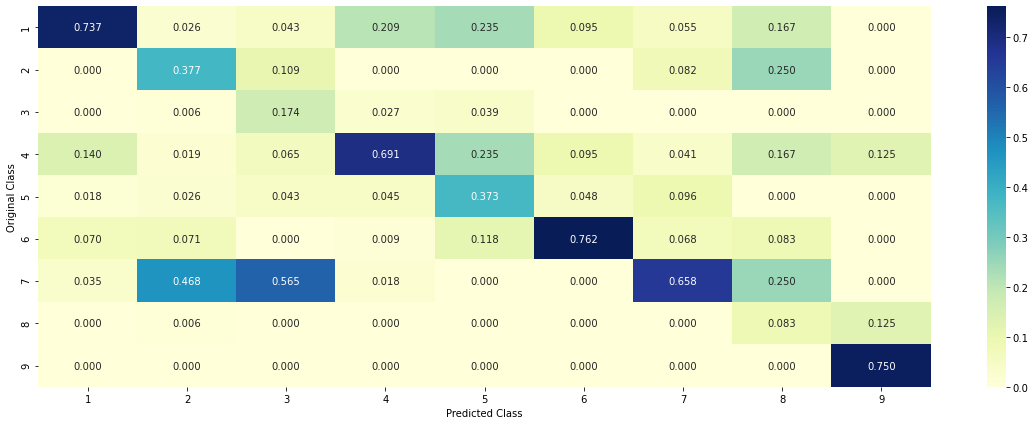

-------------------- Recall matrix (Row sum=1) --------------------


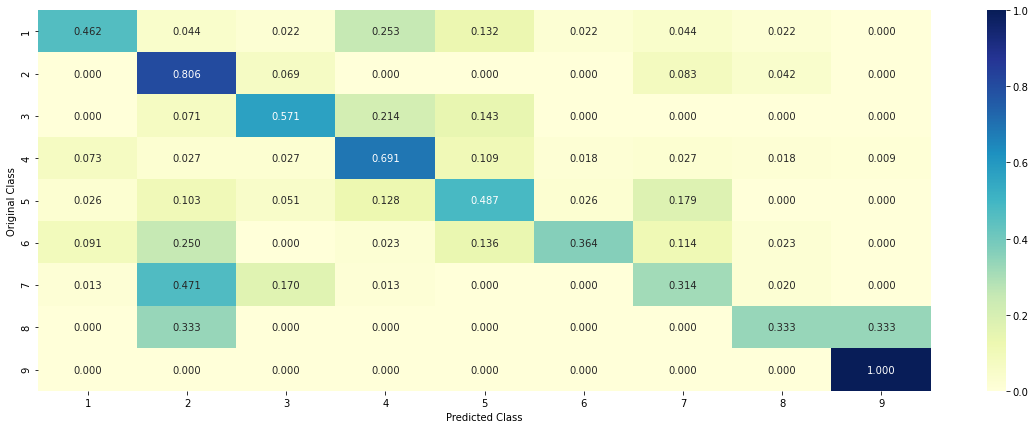

In [96]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [97]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 6
Predicted Class Probabilities: [[0.0268 0.136  0.1551 0.0291 0.0675 0.2923 0.2334 0.0348 0.0249]]
Actual Class : 6
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [98]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 4
Predicted Class Probabilities: [[0.2653 0.0326 0.1622 0.383  0.0333 0.0419 0.013  0.0318 0.037 ]]
Actual Class : 1
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [99]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.14
Support vector machines : Log Loss: 1.75
Naive Bayes : Log Loss: 1.26
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 1.818
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.721
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.333
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.195
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.458
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.797


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.49785039003533654
Log loss (CV) on the stacking classifier : 1.1951497364705461
Log loss (test) on the stacking classifier : 1.185791584632869
Number of missclassified point : 0.3774436090225564
-------------------- Confusion matrix --------------------


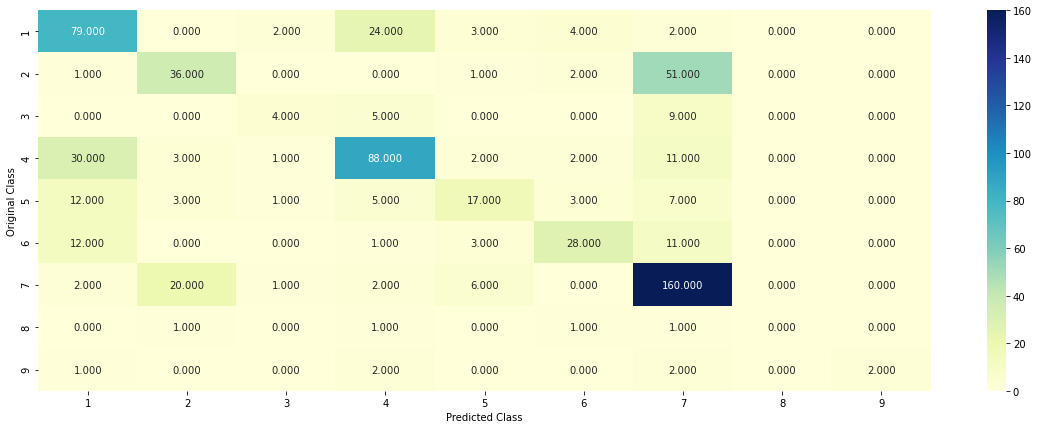

-------------------- Precision matrix (Columm Sum=1) --------------------


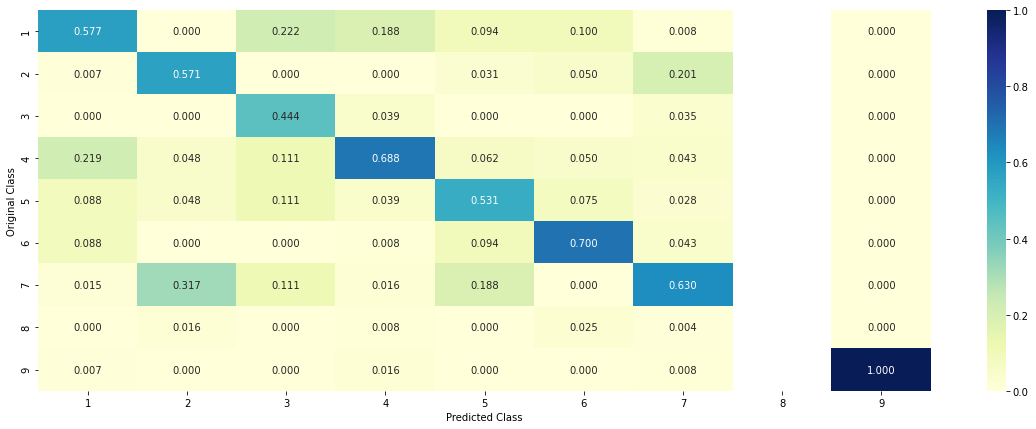

-------------------- Recall matrix (Row sum=1) --------------------


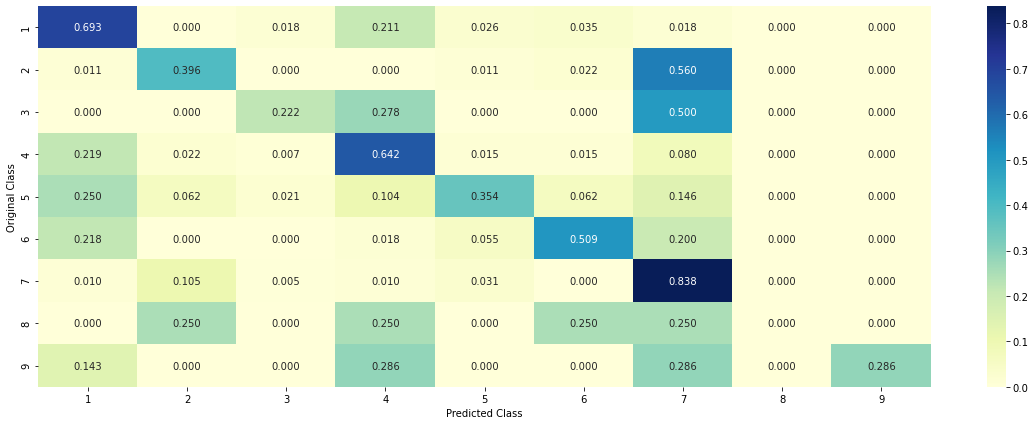

In [100]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.854300452875433
Log loss (CV) on the VotingClassifier : 1.1921902836843068
Log loss (test) on the VotingClassifier : 1.2079762671495735
Number of missclassified point : 0.3774436090225564
-------------------- Confusion matrix --------------------


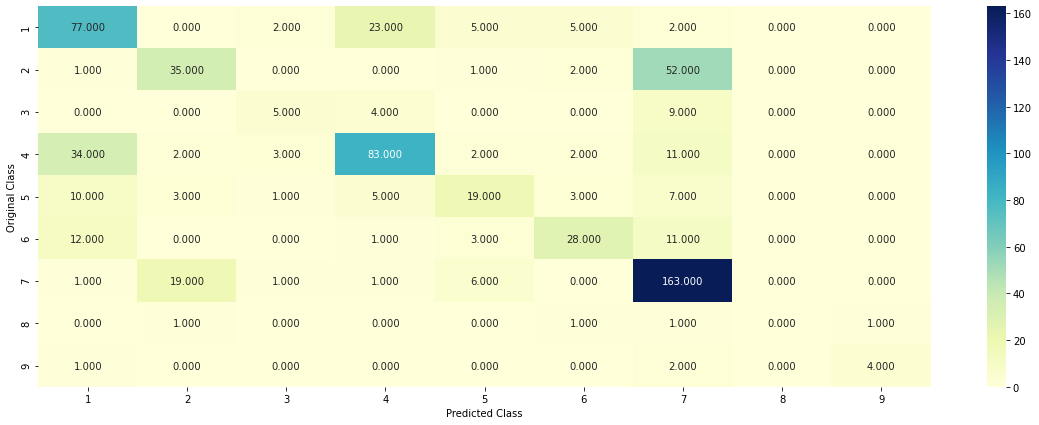

-------------------- Precision matrix (Columm Sum=1) --------------------


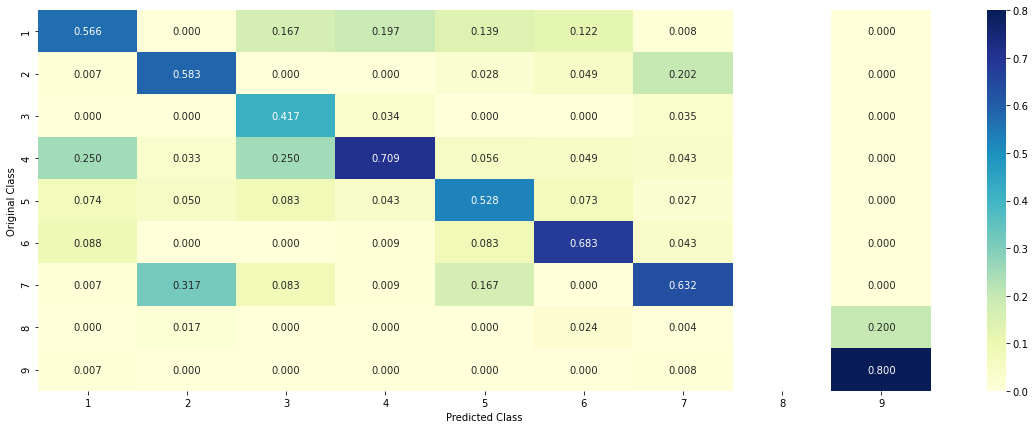

-------------------- Recall matrix (Row sum=1) --------------------


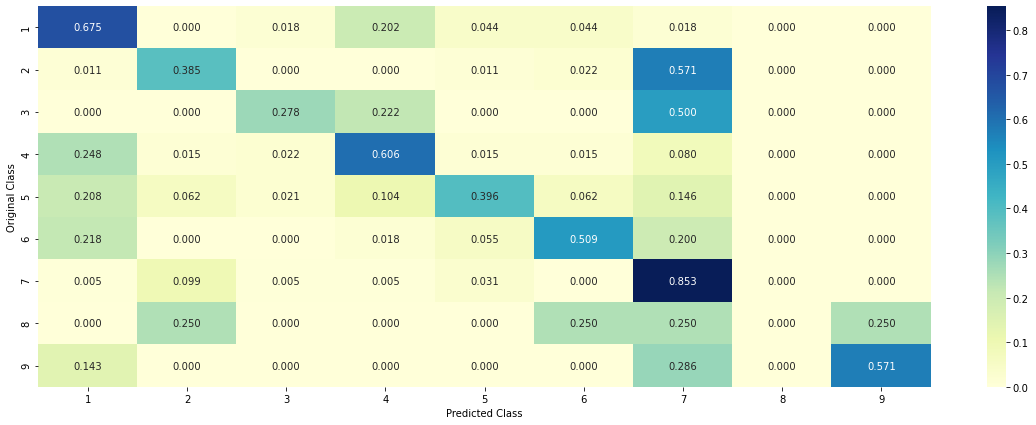

In [101]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

<h1>5. Assignments</h1>

<ol>
    <li> Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer and run the same cells)</li>
    <li> Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
    <li> Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0</li>
</ol>

In [102]:
train_df, cv_df, y_train, y_cv, test_df, y_test

(        ID   Gene              Variation  Class  \
 111    111   MSH6                  V509A      5   
 1379  1379  FGFR1  FGFR1OP1-FGFR1_Fusion      7   
 2160  2160   PTEN                  T401I      4   
 1457  1457  FGFR2                  T730S      5   
 2404  2404    NF1                 R2450*      1   
 ...    ...    ...                    ...    ...   
 1133  1133    MET         Overexpression      7   
 2652  2652  BRCA1                 M1652K      1   
 1901  1901   TET1        MLL-TET1_Fusion      7   
 2539  2539  BRCA1                 C1767S      5   
 66      66  PTPRT                 N1125I      4   
 
                                                    TEXT  
 111   identification high risk disease causing const...  
 1379  fop fibroblast growth factor receptor 1 fgfr1 ...  
 2160  tumor suppressor gene pten frequently mutated ...  
 1457  discovery oncogenic driver mutations subsequen...  
 2404  cancer therapy arguably entered transformation...  
 ...                

# Task 1 :
Apply all the models with tf-idf features

In [103]:
train_df.head()

ID   Gene              Variation  Class  \
111    111   MSH6                  V509A      5   
1379  1379  FGFR1  FGFR1OP1-FGFR1_Fusion      7   
2160  2160   PTEN                  T401I      4   
1457  1457  FGFR2                  T730S      5   
2404  2404    NF1                 R2450*      1   

                                                   TEXT  
111   identification high risk disease causing const...  
1379  fop fibroblast growth factor receptor 1 fgfr1 ...  
2160  tumor suppressor gene pten frequently mutated ...  
1457  discovery oncogenic driver mutations subsequen...  
2404  cancer therapy arguably entered transformation...

In [104]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
tfidf_vectorizer = TfidfVectorizer(min_df=3)
train_text__ohe_tfidf = tfidf_vectorizer.fit_transform(train_df['TEXT'])

cv_text__ohe_tfidf = tfidf_vectorizer.transform(cv_df['TEXT'])
test_text__ohe_tfidf = tfidf_vectorizer.transform(test_df['TEXT'])

In [105]:
idf_values = tfidf_vectorizer.idf_

In [106]:
sorted_ind = np.argsort(-idf_values) #-ve sign to get sorting in decreasing order, so that we can easily pick 1000 indices corresponding to top idf values
top_1k_ind = sorted_ind[0:1000]
top_1k_ind.shape

(1000,)

In [107]:
print(f"We have {len(tfidf_vectorizer.get_feature_names())} features.")

print('-'*100)

top_1k_feat = np.array(tfidf_vectorizer.get_feature_names())[top_1k_ind]

We have 52325 features.
----------------------------------------------------------------------------------------------------


### Preparing data for models

In [108]:
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_task1 = hstack((train_gene_var_onehotCoding, train_text__ohe_tfidf)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_task1= hstack((test_gene_var_onehotCoding, test_text__ohe_tfidf)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_task1 = hstack((cv_gene_var_onehotCoding, cv_text__ohe_tfidf)).tocsr()
cv_y = np.array(list(cv_df['Class']))

print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_task1.shape)
print("(number of data points * number of features) in test data = ", test_x_task1.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_task1.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 54526)
(number of data points * number of features) in test data =  (665, 54526)
(number of data points * number of features) in cross validation data = (532, 54526)


## Models

### Naive Bayes

#### Hyper-Param Tuning

for alpha = 1e-05
Log Loss : 1.1681805501337055
for alpha = 0.0001
Log Loss : 1.1633205328219256
for alpha = 0.001
Log Loss : 1.1624756591523586
for alpha = 0.1
Log Loss : 1.209223272643476
for alpha = 1
Log Loss : 1.2791165893752867
for alpha = 10
Log Loss : 1.2897245940778452
for alpha = 100
Log Loss : 1.3269112743394624
for alpha = 1000
Log Loss : 1.3379262622931989


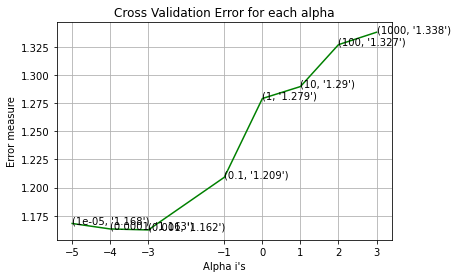

For values of best alpha =  0.001 The train log loss is: 0.604669854887047
For values of best alpha =  0.001 The cross validation log loss is: 1.1624756591523586
For values of best alpha =  0.001 The test log loss is: 1.2093740205169945


In [109]:
#code is used from above cells

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_task1, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_task1, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_task1)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_task1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task1, train_y)


predict_y = sig_clf.predict_proba(train_x_task1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_task1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_task1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


#### Testing model using best hyp-param

Log Loss : 1.2093740205169945
Number of missclassified point : 0.3804511278195489
-------------------- Confusion matrix --------------------


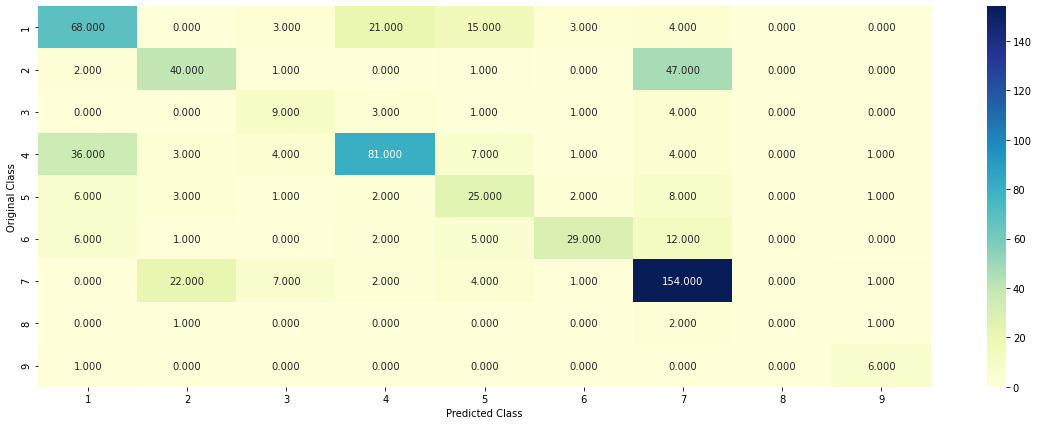

-------------------- Precision matrix (Columm Sum=1) --------------------


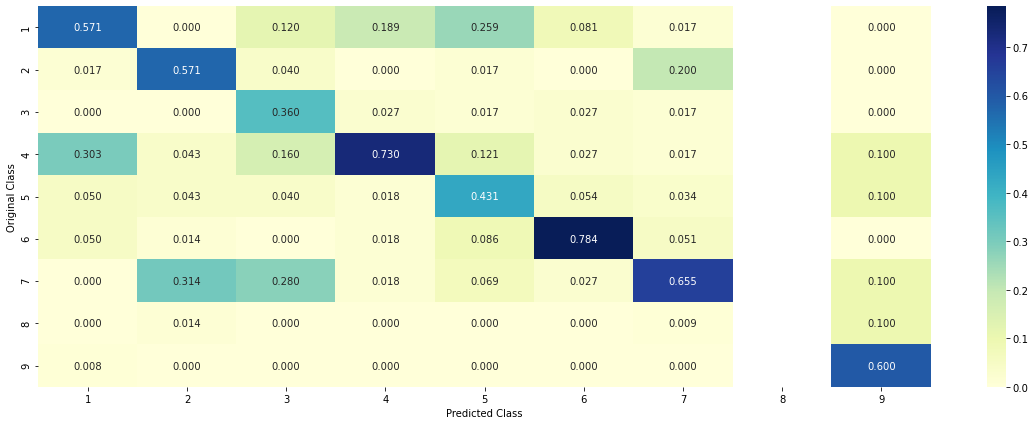

-------------------- Recall matrix (Row sum=1) --------------------


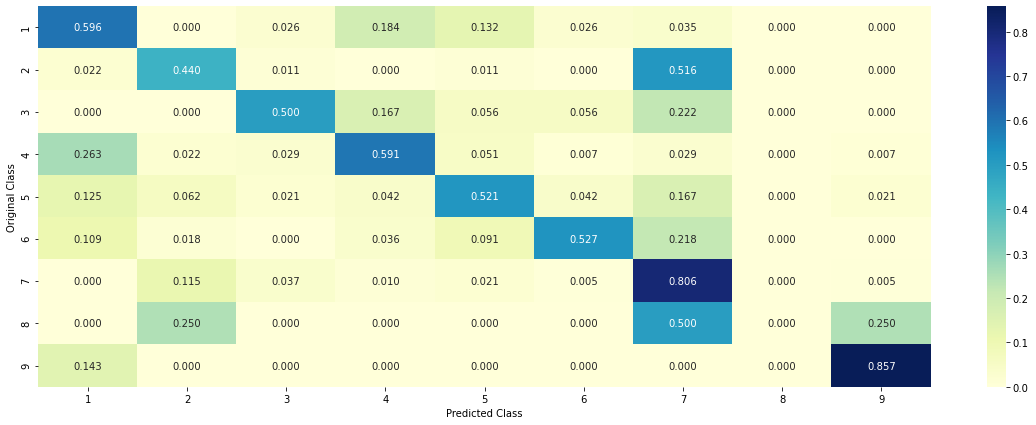

In [110]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_task1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task1, train_y)
sig_clf_probs = sig_clf.predict_proba(test_x_task1)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
log_loss_nb_task1 = log_loss(test_y, sig_clf_probs)
print("Log Loss :",log_loss_nb_task1)

mis_nb_task1 = np.count_nonzero((sig_clf.predict(test_x_task1)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_nb_task1)
plot_confusion_matrix(test_y, sig_clf.predict(test_x_task1.toarray()))

### Logistic Regression (With Class Balancing)

#### Hyper-Param Tuning

for alpha = 1e-06
Log Loss : 1.113252723065378
for alpha = 1e-05
Log Loss : 1.0127350582853454
for alpha = 0.0001
Log Loss : 0.9713052967911167
for alpha = 0.001
Log Loss : 1.0445269950929321
for alpha = 0.01
Log Loss : 1.2048028465669165
for alpha = 0.1
Log Loss : 1.4345313724604072
for alpha = 1
Log Loss : 1.5137381132844288
for alpha = 10
Log Loss : 1.5236745431599072
for alpha = 100
Log Loss : 1.5248423494164984


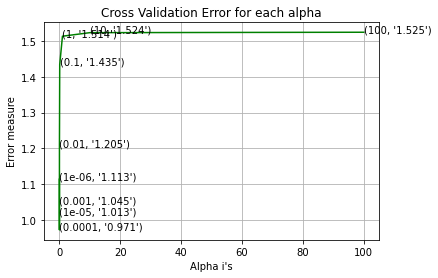

For values of best alpha =  0.0001 The train log loss is: 0.3584764718262102
For values of best alpha =  0.0001 The cross validation log loss is: 0.9713052967911167
For values of best alpha =  0.0001 The test log loss is: 0.9871342672805788


In [111]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_task1, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_task1, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_task1)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task1, train_y)

predict_y = sig_clf.predict_proba(train_x_task1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_task1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_task1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing model using best hyp-param

Log Loss : 0.9954507668347623
Number of missclassified point : 0.37593984962406013
-------------------- Confusion matrix --------------------


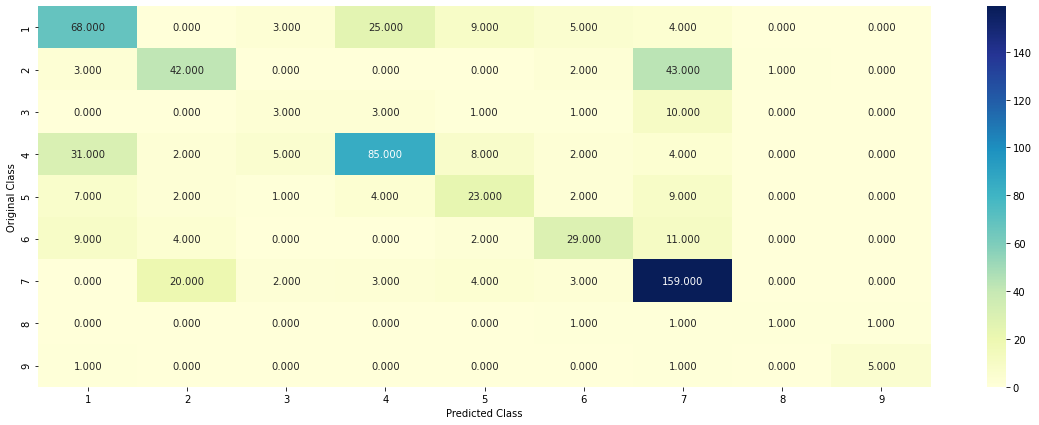

-------------------- Precision matrix (Columm Sum=1) --------------------


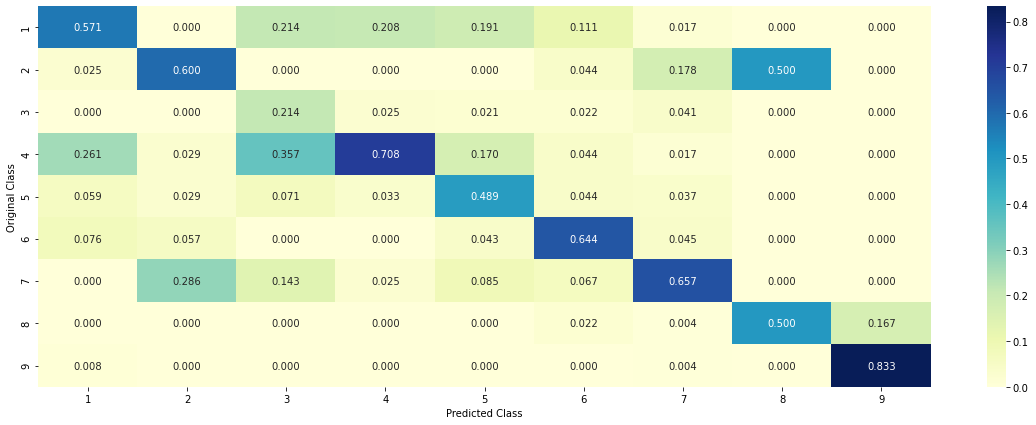

-------------------- Recall matrix (Row sum=1) --------------------


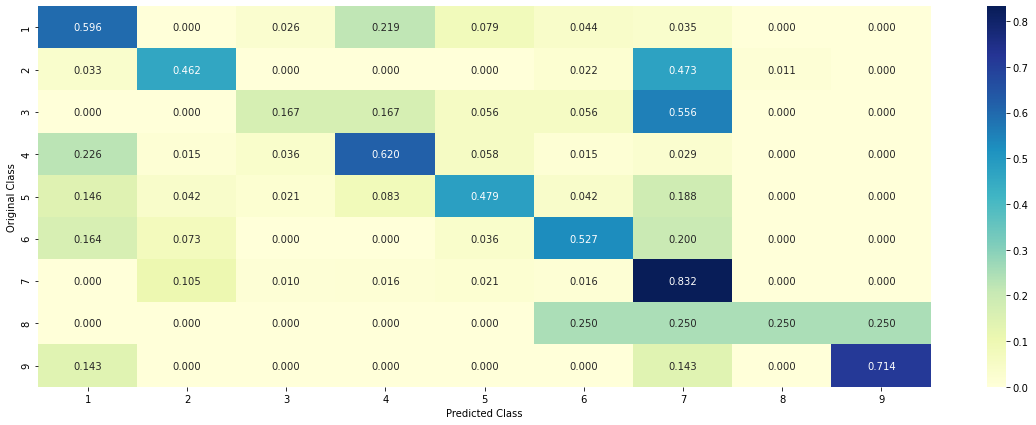

In [112]:

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task1, train_y)
clf_probs = clf.predict_proba(test_x_task1)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
log_loss_lr_task1 = log_loss(test_y, clf_probs)
print("Log Loss :",log_loss_lr_task1)

mis_lr_task1 = np.count_nonzero((clf.predict(test_x_task1)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_lr_task1)
plot_confusion_matrix(test_y, clf.predict(test_x_task1.toarray()))

### Logistic Regression (Without Class Balancing)

#### Hyp-Param Tuning

for alpha = 1e-06
Log Loss : 1.1402949112080232
for alpha = 1e-05
Log Loss : 1.0139848524145954
for alpha = 0.0001
Log Loss : 0.9767847147489832
for alpha = 0.001
Log Loss : 1.054028060949947
for alpha = 0.01
Log Loss : 1.2252948950258646
for alpha = 0.1
Log Loss : 1.381878172865997
for alpha = 1
Log Loss : 1.4513342072958038


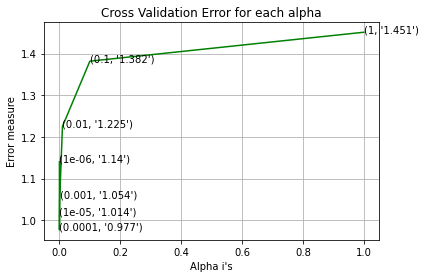

For values of best alpha =  0.0001 The train log loss is: 0.3487788669790104
For values of best alpha =  0.0001 The cross validation log loss is: 0.9767847147489832
For values of best alpha =  0.0001 The test log loss is: 0.9876634088336119


In [113]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_task1, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_task1, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_task1)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task1, train_y)

predict_y = sig_clf.predict_proba(train_x_task1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_task1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_task1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing model using best parameter

Log Loss : 0.9891278957821513
Number of missclassified point : 0.35789473684210527
-------------------- Confusion matrix --------------------


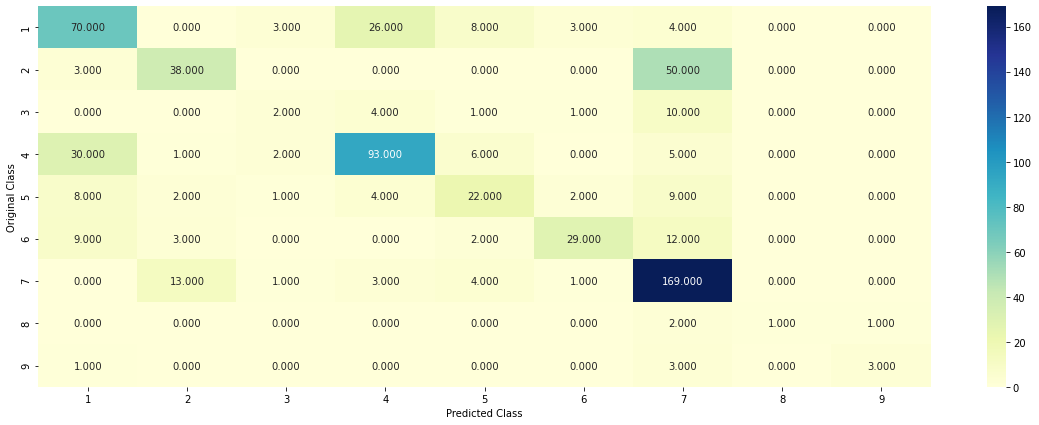

-------------------- Precision matrix (Columm Sum=1) --------------------


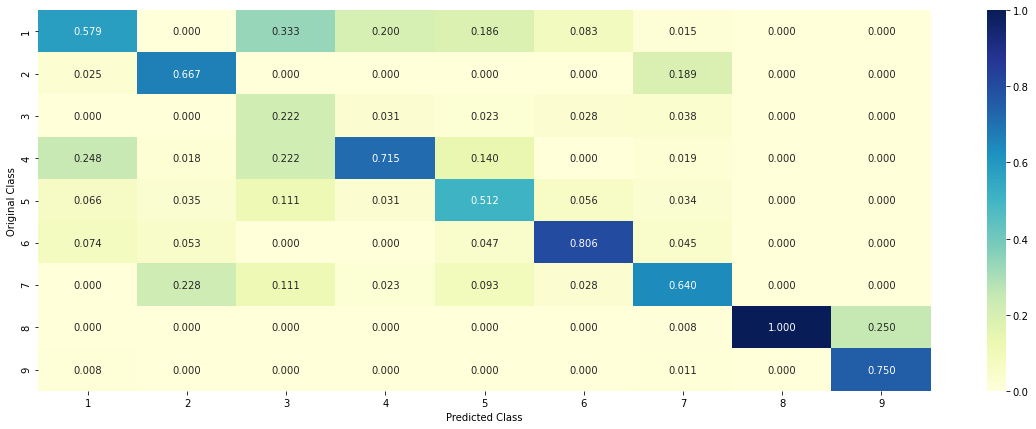

-------------------- Recall matrix (Row sum=1) --------------------


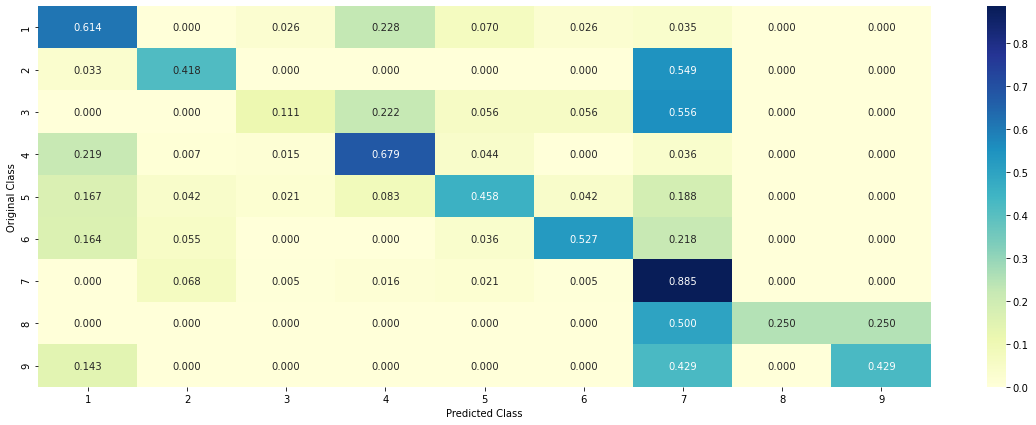

In [114]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task1, train_y)
clf_probs = clf.predict_proba(test_x_task1)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
log_loss_lr_task1_2 = log_loss(test_y, clf_probs)
print("Log Loss :",log_loss_lr_task1_2)

mis_lr_task1_2 = np.count_nonzero((clf.predict(test_x_task1)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_lr_task1_2)
plot_confusion_matrix(test_y, clf.predict(test_x_task1.toarray()))

### Linear SVM

#### Hyp. Param Tuning

for C = 1e-05
Log Loss : 1.0663620574253254
for C = 0.0001
Log Loss : 1.0033799829399008
for C = 0.001
Log Loss : 1.0692450698298461
for C = 0.01
Log Loss : 1.268016908171006
for C = 0.1
Log Loss : 1.4546708117236273
for C = 1
Log Loss : 1.5251545078731903
for C = 10
Log Loss : 1.5251544512172097
for C = 100
Log Loss : 1.5251544233461165


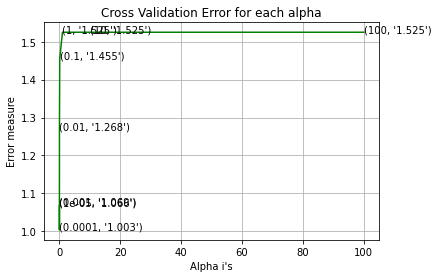

For values of best alpha =  0.0001 The train log loss is: 0.3062518610774247
For values of best alpha =  0.0001 The cross validation log loss is: 1.0033799829399008
For values of best alpha =  0.0001 The test log loss is: 1.037090342988821


In [115]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_task1, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_task1, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_task1)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_task1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task1, train_y)

predict_y = sig_clf.predict_proba(train_x_task1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_task1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_task1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Model is being overfit, so it's not helpful

#### Testing model using best hyp. param

Log Loss : 1.037090342988821
Number of missclassified point : 0.3593984962406015
-------------------- Confusion matrix --------------------


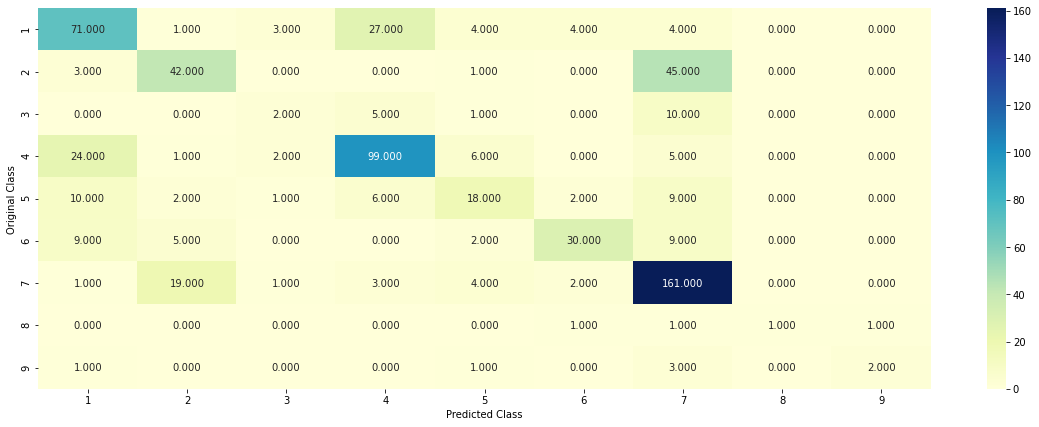

-------------------- Precision matrix (Columm Sum=1) --------------------


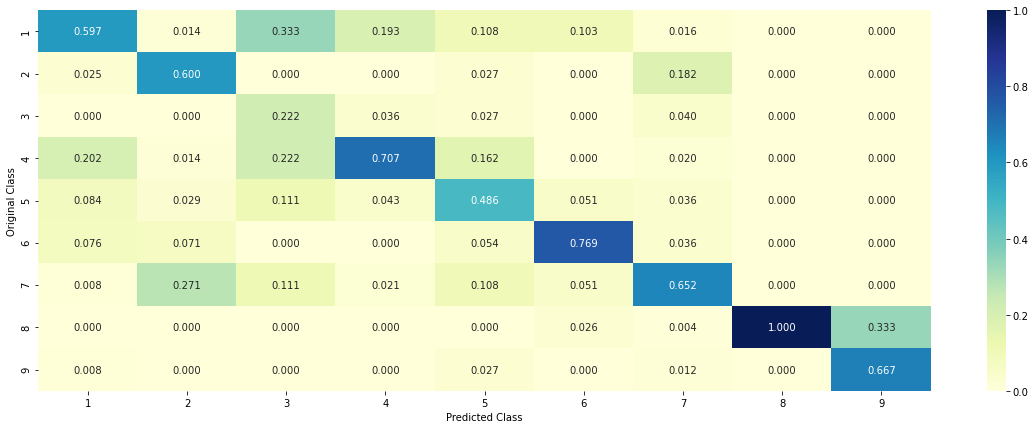

-------------------- Recall matrix (Row sum=1) --------------------


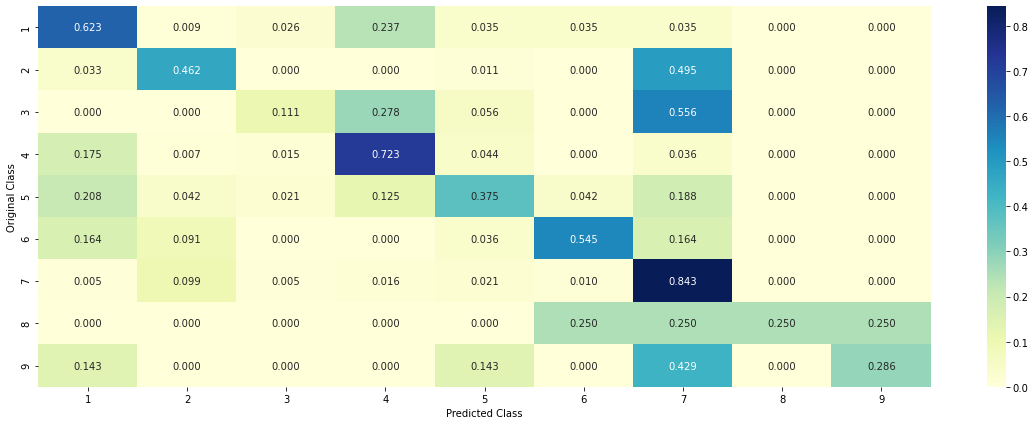

In [116]:
clf = SGDClassifier(class_weight = 'balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_task1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task1, train_y)
sig_clf_probs = sig_clf.predict_proba(test_x_task1)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
log_loss_svm_task1 = log_loss(test_y, sig_clf_probs)
print("Log Loss :",log_loss_svm_task1)

mis_svm_task1 = np.count_nonzero((sig_clf.predict(test_x_task1)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_svm_task1)
plot_confusion_matrix(test_y, sig_clf.predict(test_x_task1.toarray()))

### Random Forest

#### Hyp. Parama Tuning

In [117]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_task1, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_task1, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_task1)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_task1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task1, train_y)

predict_y = sig_clf.predict_proba(train_x_task1)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_task1)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_task1)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.183281311735548
for n_estimators = 100 and max depth =  10
Log Loss : 1.072487088887855
for n_estimators = 200 and max depth =  5
Log Loss : 1.1801014680829753
for n_estimators = 200 and max depth =  10
Log Loss : 1.066360004373141
for n_estimators = 500 and max depth =  5
Log Loss : 1.1756060622002775
for n_estimators = 500 and max depth =  10
Log Loss : 1.0635604773833578
for n_estimators = 1000 and max depth =  5
Log Loss : 1.173138925247816
for n_estimators = 1000 and max depth =  10
Log Loss : 1.062274105333361
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1694891268098566
for n_estimators = 2000 and max depth =  10
Log Loss : 1.0597023645023842
For values of best estimator =  2000 The train log loss is: 0.6249527345396696
For values of best estimator =  2000 The cross validation log loss is: 1.0597023645023844
For values of best estimator =  2000 The test log loss is: 1.1045169738442981


#### Testing model using best hyp. params

Log Loss : 1.1045169738442981
Number of missclassified point : 0.3849624060150376
-------------------- Confusion matrix --------------------


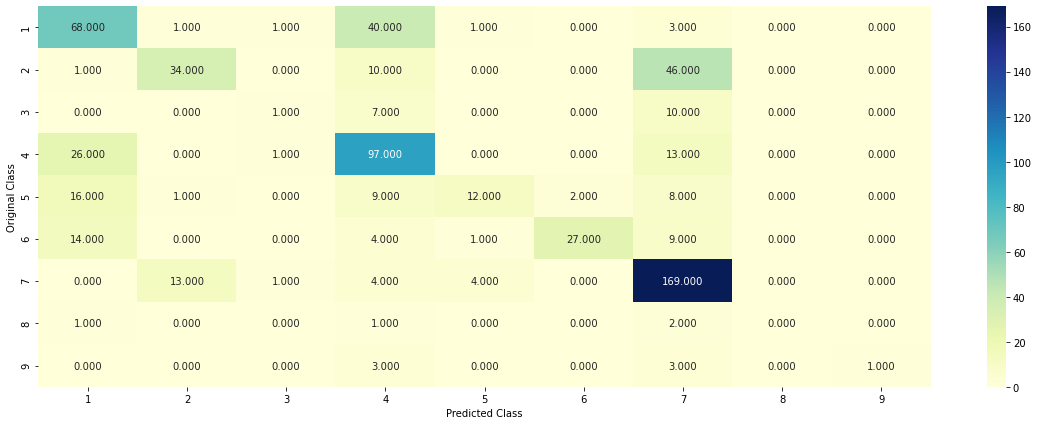

-------------------- Precision matrix (Columm Sum=1) --------------------


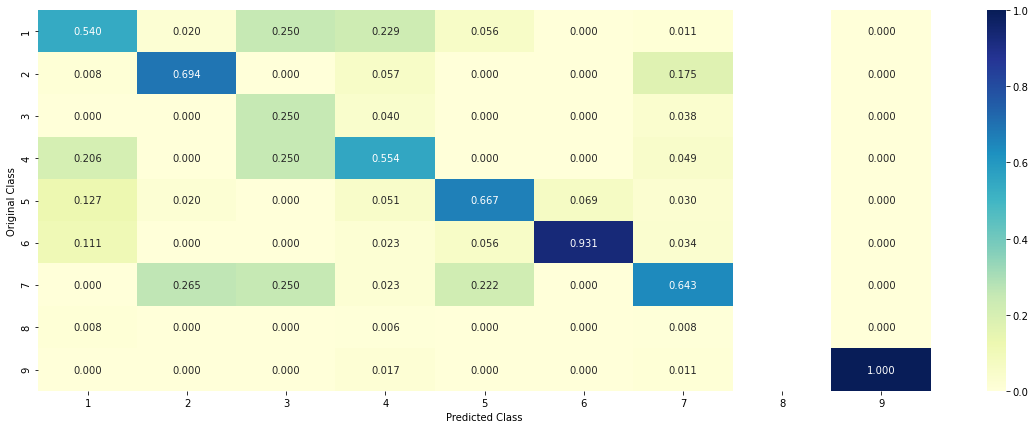

-------------------- Recall matrix (Row sum=1) --------------------


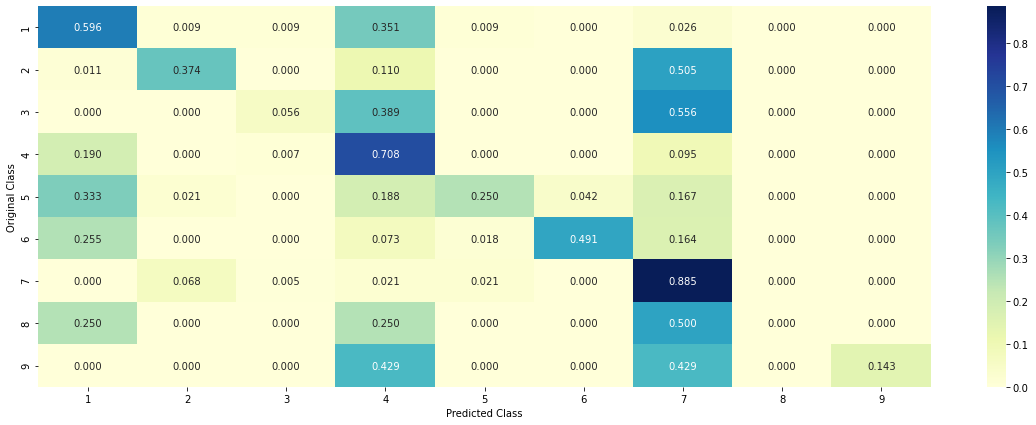

In [118]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_task1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task1, train_y)
sig_clf_probs = sig_clf.predict_proba(test_x_task1)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
log_loss_rf_task1 = log_loss(test_y, sig_clf_probs)
print("Log Loss :",log_loss_rf_task1)

mis_rf_task1 = np.count_nonzero((sig_clf.predict(test_x_task1)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_rf_task1)
plot_confusion_matrix(test_y, sig_clf.predict(test_x_task1.toarray()))

### Stacking Classifier

#### Hyp. Param. Tuning

In [119]:
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_task1, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_task1, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_task1, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_task1, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_task1))))
sig_clf2.fit(train_x_task1, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_task1))))
sig_clf3.fit(train_x_task1, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_task1))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_task1, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_task1))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_task1))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.04
Support vector machines : Log Loss: 1.53
Naive Bayes : Log Loss: 1.16
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 1.818
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.723
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.336
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.147
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.383
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.739


#### Testing model using best hyp. param

Log loss (train) on the stacking classifier : 0.45421390042915055
Log loss (CV) on the stacking classifier : 1.1467339530756326
Log loss (test) on the stacking classifier : 1.17631329277845
Number of missclassified point : 0.3699248120300752
-------------------- Confusion matrix --------------------


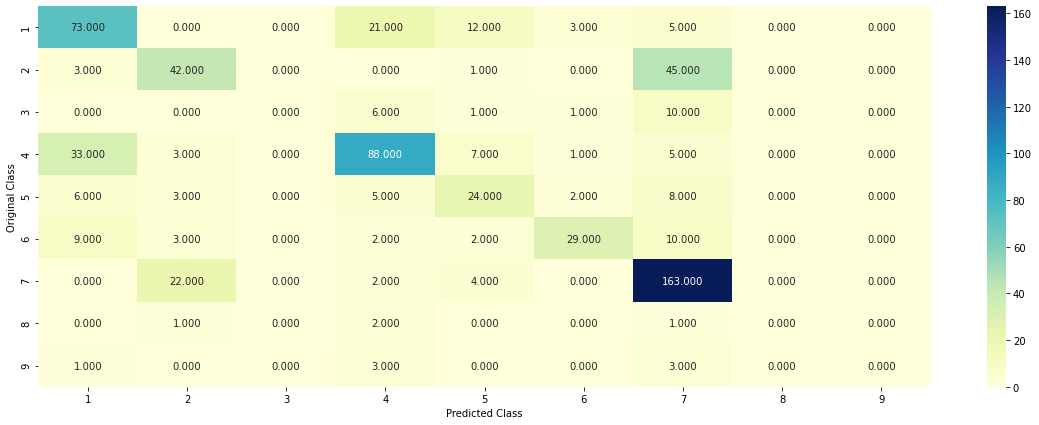

-------------------- Precision matrix (Columm Sum=1) --------------------


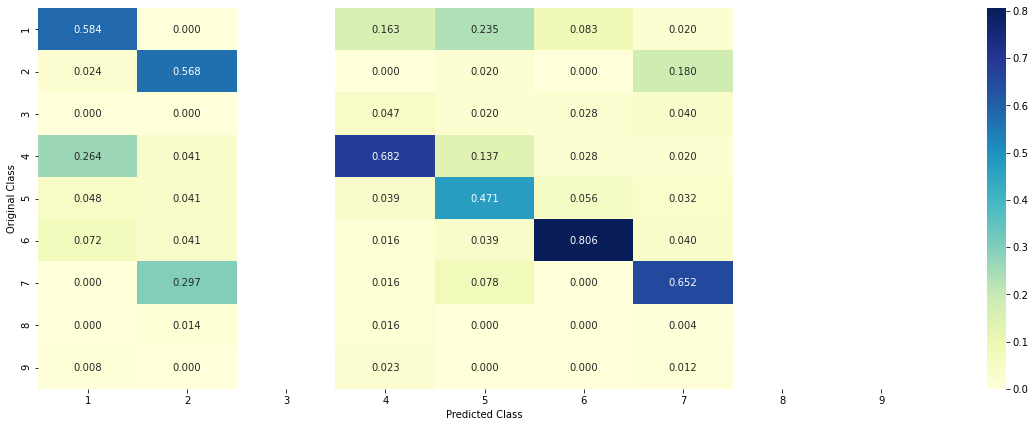

-------------------- Recall matrix (Row sum=1) --------------------


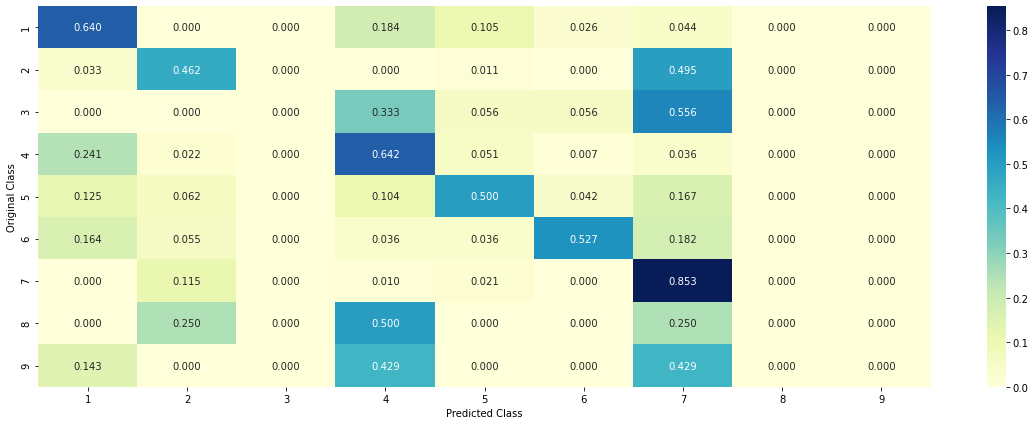

In [120]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_task1, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_task1))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_task1))
print("Log loss (CV) on the stacking classifier :",log_error)


log_loss_sclf_task1 = log_loss(test_y, sclf.predict_proba(test_x_task1))
print("Log loss (test) on the stacking classifier :",log_loss_sclf_task1)

mis_sclf_task1 = np.count_nonzero((sclf.predict(test_x_task1)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_sclf_task1)
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_task1))

In [316]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Text Data Encoding', 'Model', 'Log_Loss', 'Misclassified Points']

x.add_row(['TFIDF', 'Naive Bayes', log_loss_nb_task1, mis_nb_task1])
x.add_row(['TFIDF', 'Logistic Regression(Balanced Data)', log_loss_lr_task1, mis_lr_task1])
x.add_row(['TFIDF', 'Logistic Regression', log_loss_lr_task1_2, mis_lr_task1_2])
x.add_row(['TFIDF', 'Linear SVM(Balanced Data)', log_loss_svm_task1, mis_svm_task1])
x.add_row(['TFIDF', 'Random Forest', log_loss_rf_task1, mis_rf_task1])
x.add_row(['TFIDF', 'Stacking Classifier', log_loss_sclf_task1, mis_sclf_task1])


print(x)

+--------------------+------------------------------------+--------------------+----------------------+
| Text Data Encoding |               Model                |      Log_Loss      | Misclassified Points |
+--------------------+------------------------------------+--------------------+----------------------+
|       TFIDF        |            Naive Bayes             | 1.2093740205169945 |  0.3804511278195489  |
|       TFIDF        | Logistic Regression(Balanced Data) | 0.9954507668347623 | 0.37593984962406013  |
|       TFIDF        |        Logistic Regression         | 0.9891278957821513 | 0.35789473684210527  |
|       TFIDF        |     Linear SVM(Balanced Data)      | 1.037090342988821  |  0.3593984962406015  |
|       TFIDF        |           Random Forest            | 1.1045169738442981 |  0.3849624060150376  |
|       TFIDF        |        Stacking Classifier         |  1.17631329277845  |  0.3699248120300752  |
+--------------------+------------------------------------+-----

# TASK - 2

Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values
Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams
Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0

In [125]:
#create tfidf data matrix using top 1000 words chosen by best idf score
tfidf = TfidfVectorizer(vocabulary = top_1k_feat)
train_text_top1k_ohe = tfidf.fit_transform(train_df['TEXT'])

cv_text_top1k_ohe = tfidf.transform(cv_df['TEXT'])
test_text_top1k_ohe = tfidf.transform(test_df['TEXT'])

In [126]:

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_task2 = hstack((train_gene_var_onehotCoding, train_text_top1k_ohe)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_task2= hstack((test_gene_var_onehotCoding, test_text_top1k_ohe)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_task2 = hstack((cv_gene_var_onehotCoding, cv_text_top1k_ohe)).tocsr()
cv_y = np.array(list(cv_df['Class']))

print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_task2.shape)
print("(number of data points * number of features) in test data = ", test_x_task2.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_task2.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 3201)
(number of data points * number of features) in test data =  (665, 3201)
(number of data points * number of features) in cross validation data = (532, 3201)


## ML Models

### Naive Bayes

#### Hyper-Param Tuning

for alpha = 1e-05
Log Loss : 1.2967744715251
for alpha = 0.0001
Log Loss : 1.2931415539834379
for alpha = 0.001
Log Loss : 1.2857850572601608
for alpha = 0.1
Log Loss : 1.2214407927023245
for alpha = 1
Log Loss : 1.1749886152626303
for alpha = 10
Log Loss : 1.2659303302880178
for alpha = 100
Log Loss : 1.3396333837133467
for alpha = 1000
Log Loss : 1.3522698024351796


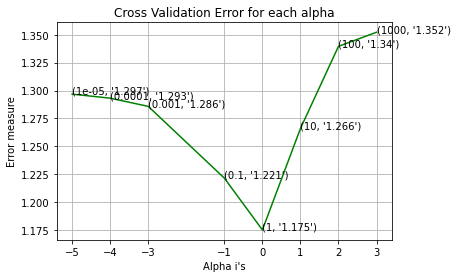

For values of best alpha =  1 The train log loss is: 0.6499586512788597
For values of best alpha =  1 The cross validation log loss is: 1.1749886152626303
For values of best alpha =  1 The test log loss is: 1.1792737740242152


In [128]:
#code is used from above cells

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_task1, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_task2, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_task2)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_task2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task2, train_y)


predict_y = sig_clf.predict_proba(train_x_task2)
tr_log_loss_nb_task2 = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",tr_log_loss_nb_task2)


predict_y = sig_clf.predict_proba(cv_x_task2)
cv_log_loss_nb_task2 = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",cv_log_loss_nb_task2)

predict_y = sig_clf.predict_proba(test_x_task2)
te_log_loss_nb_task2 = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", te_log_loss_nb_task2)


#### Testing model using best hyp-param

Log Loss : 1.1792737740242152
Number of missclassified point : 0.4105263157894737
-------------------- Confusion matrix --------------------


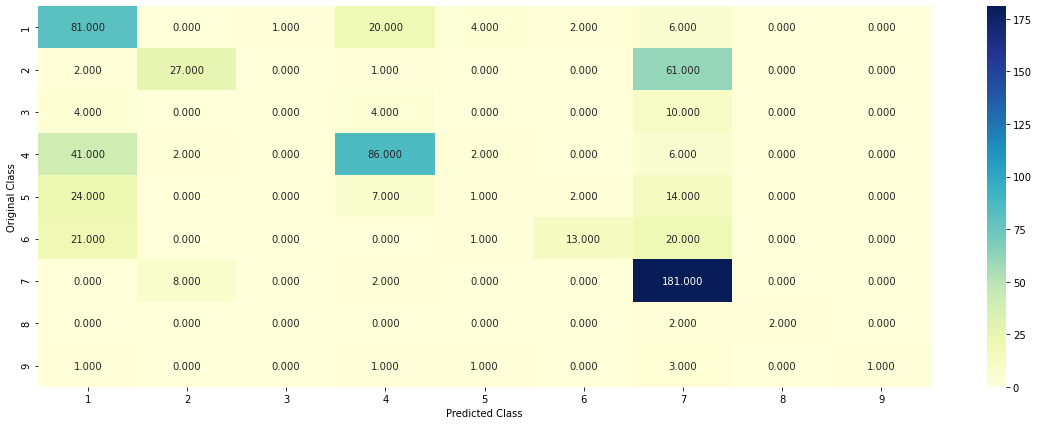

-------------------- Precision matrix (Columm Sum=1) --------------------


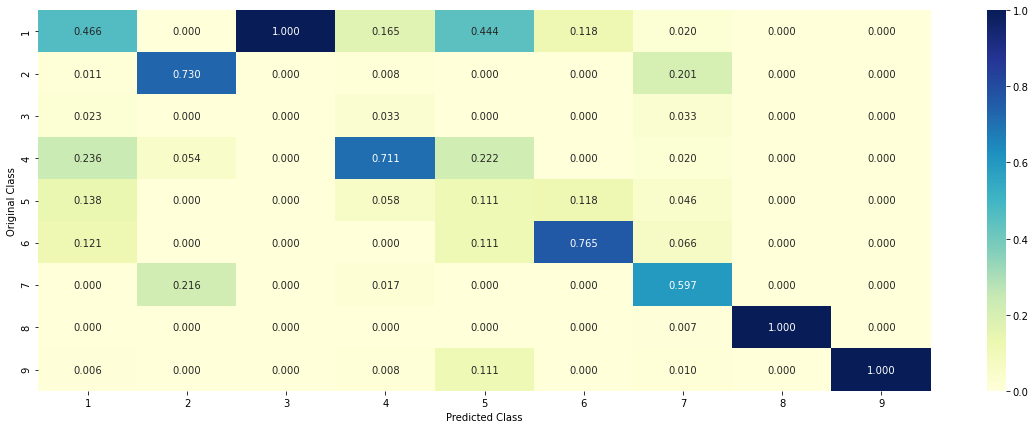

-------------------- Recall matrix (Row sum=1) --------------------


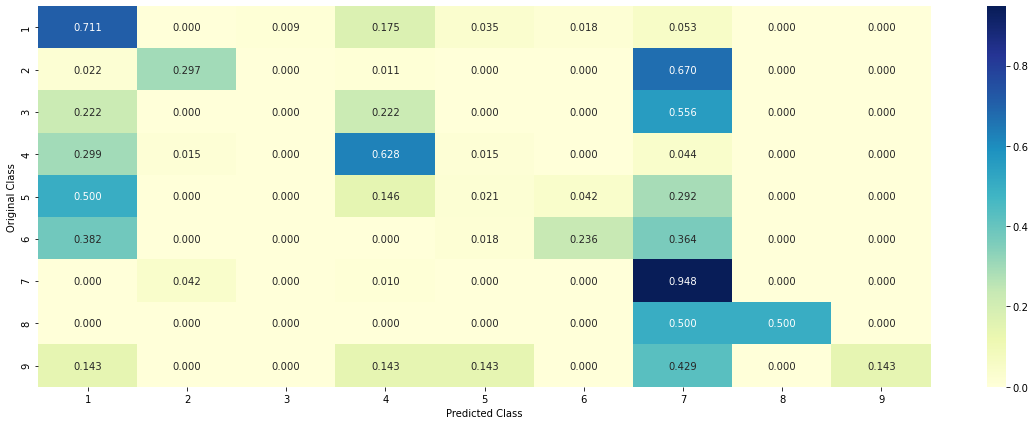

In [130]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_task2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task2, train_y)
sig_clf_probs = sig_clf.predict_proba(test_x_task2)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
log_loss_nb_task2 = log_loss(test_y, sig_clf_probs)
print("Log Loss :",log_loss_nb_task2)

mis_nb_task2 = np.count_nonzero((sig_clf.predict(test_x_task2)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_nb_task2)
plot_confusion_matrix(test_y, sig_clf.predict(test_x_task2.toarray()))

### Logistic Regression (With Class Balancing)

#### Hyper-Param Tuning

for alpha = 1e-06
Log Loss : 1.3486050736438566
for alpha = 1e-05
Log Loss : 1.1642844631912213
for alpha = 0.0001
Log Loss : 1.0961125017464335
for alpha = 0.001
Log Loss : 1.1373874340349472
for alpha = 0.01
Log Loss : 1.2415753702262513
for alpha = 0.1
Log Loss : 1.3825832784182488
for alpha = 1
Log Loss : 1.4268854656412644
for alpha = 10
Log Loss : 1.4332001658511873
for alpha = 100
Log Loss : 1.4339976447674265


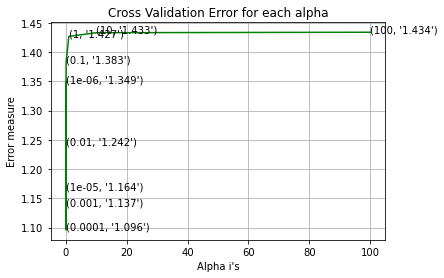

For values of best alpha =  0.0001 The train log loss is: 0.4261510204036479
For values of best alpha =  0.0001 The cross validation log loss is: 1.0961125017464335
For values of best alpha =  0.0001 The test log loss is: 1.0931963697603593


In [131]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_task2, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_task2, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_task2)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task2, train_y)

predict_y = sig_clf.predict_proba(train_x_task2)
tr_log_loss_lr_task2 = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",tr_log_loss_lr_task2)


predict_y = sig_clf.predict_proba(cv_x_task2)
cv_log_loss_lr_task2 = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",cv_log_loss_lr_task2)

predict_y = sig_clf.predict_proba(test_x_task2)
te_log_loss_lr_task2 = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", te_log_loss_lr_task2)

#### Testing model using best hyp-param

Log Loss : 1.1149447574312092
Number of missclassified point : 0.4195488721804511
-------------------- Confusion matrix --------------------


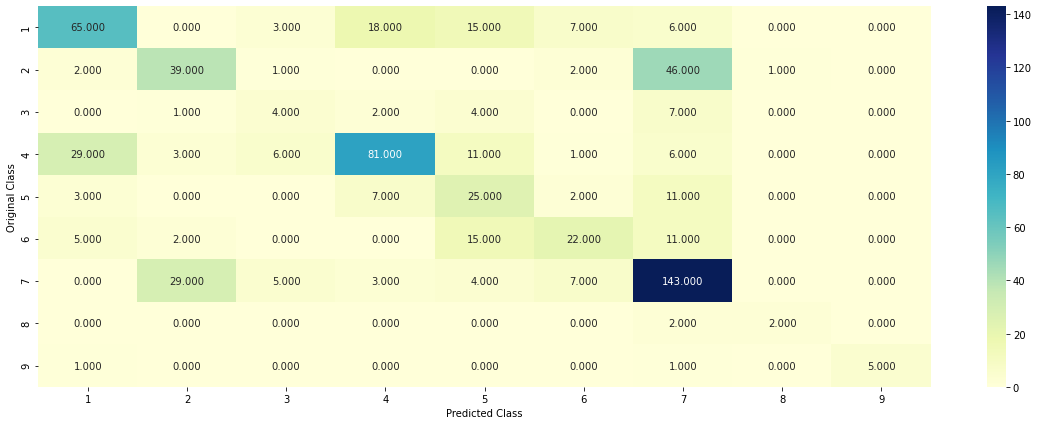

-------------------- Precision matrix (Columm Sum=1) --------------------


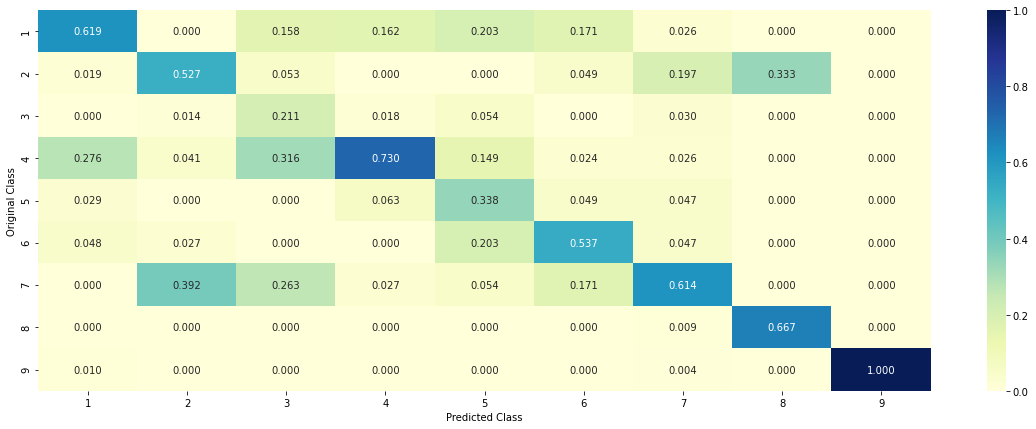

-------------------- Recall matrix (Row sum=1) --------------------


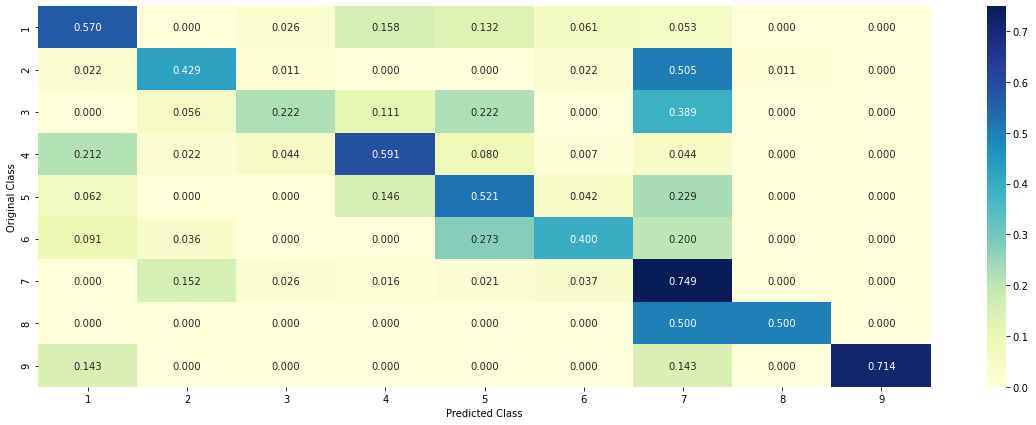

In [132]:

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task2, train_y)
clf_probs = clf.predict_proba(test_x_task2)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
log_loss_lr_task2 = log_loss(test_y, clf_probs)
print("Log Loss :",log_loss_lr_task2)

mis_lr_task2 = np.count_nonzero((clf.predict(test_x_task2)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_lr_task2)
plot_confusion_matrix(test_y, clf.predict(test_x_task2.toarray()))

### Logistic Regression (Without Class Balancing)

#### Hyp-Param Tuning

for alpha = 1e-06
Log Loss : 1.3541964341359085
for alpha = 1e-05
Log Loss : 1.1471429686934376
for alpha = 0.0001
Log Loss : 1.0994473933913906
for alpha = 0.001
Log Loss : 1.1380262210007033
for alpha = 0.01
Log Loss : 1.271393389639598
for alpha = 0.1
Log Loss : 1.3608806851544313
for alpha = 1
Log Loss : 1.3906174373889015


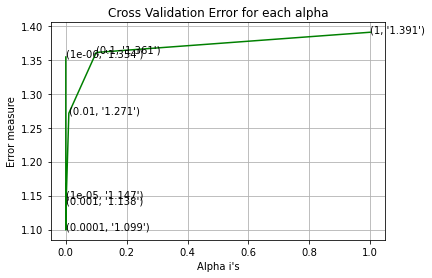

For values of best alpha =  0.0001 The train log loss is: 0.41676710813248746
For values of best alpha =  0.0001 The cross validation log loss is: 1.0994473933913906
For values of best alpha =  0.0001 The test log loss is: 1.0941734968961059


In [133]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_task2, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_task2, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_task2)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task2, train_y)

predict_y = sig_clf.predict_proba(train_x_task2)
tr_log_loss_lr_task2_2 = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",tr_log_loss_lr_task2_2)


predict_y = sig_clf.predict_proba(cv_x_task2)
cv_log_loss_lr_task2_2 = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",cv_log_loss_lr_task2_2)

predict_y = sig_clf.predict_proba(test_x_task2)
te_log_loss_lr_task2_2 = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", te_log_loss_lr_task2_2)

#### Testing model using best parameter

Log Loss : 1.0928957387489704
Number of missclassified point : 0.3954887218045113
-------------------- Confusion matrix --------------------


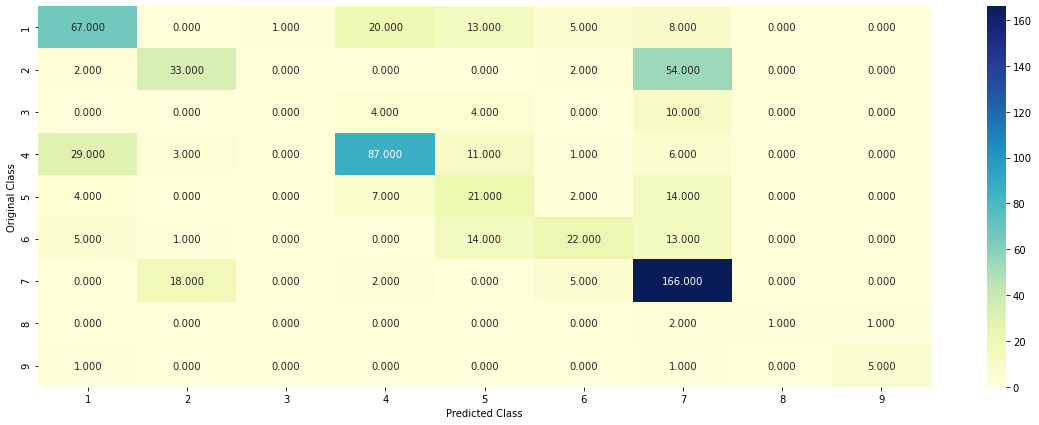

-------------------- Precision matrix (Columm Sum=1) --------------------


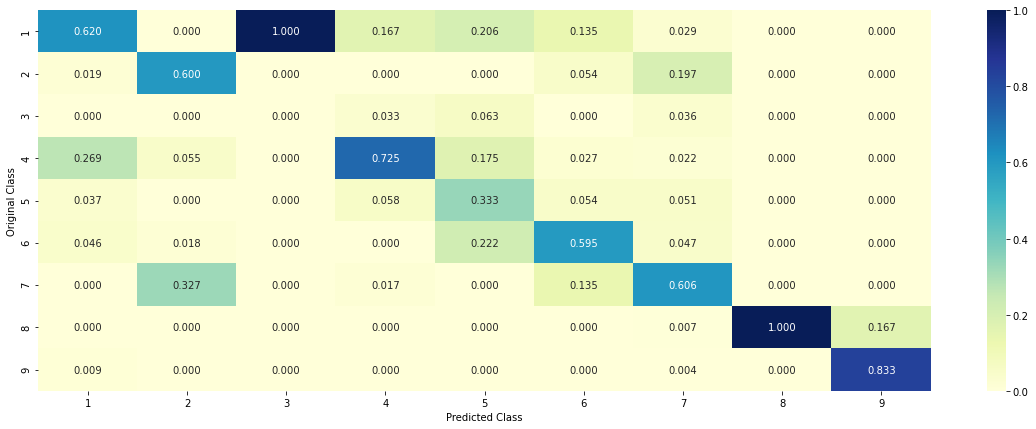

-------------------- Recall matrix (Row sum=1) --------------------


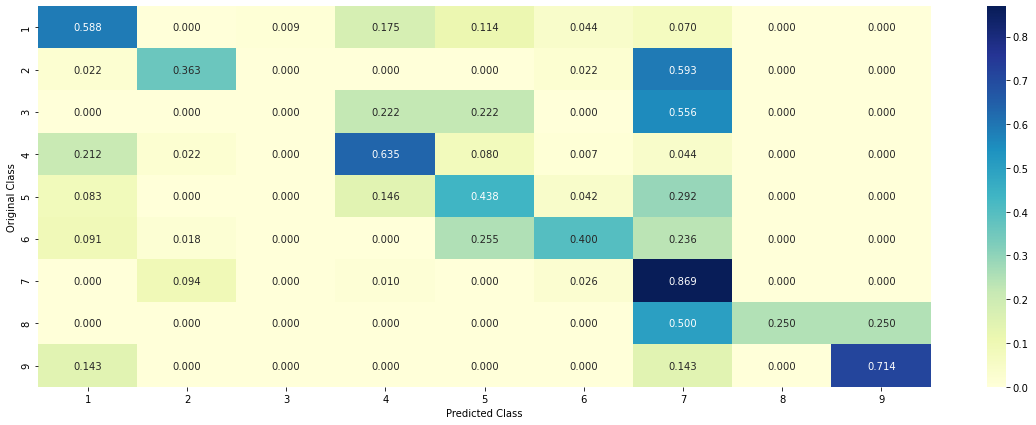

In [134]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task2, train_y)
clf_probs = clf.predict_proba(test_x_task2)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
log_loss_lr_task2_2 = log_loss(test_y, clf_probs)
print("Log Loss :",log_loss_lr_task2_2)

mis_lr_task2_2 = np.count_nonzero((clf.predict(test_x_task2)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_lr_task2_2)
plot_confusion_matrix(test_y, clf.predict(test_x_task2.toarray()))

### Linear SVM

#### Hyp. Param Tuning

for C = 1e-05
Log Loss : 1.267532698076575
for C = 0.0001
Log Loss : 1.1422985755238113
for C = 0.001
Log Loss : 1.2455644331063778
for C = 0.01
Log Loss : 1.3665061954652424
for C = 0.1
Log Loss : 1.406777096644196
for C = 1
Log Loss : 1.4342569765094326
for C = 10
Log Loss : 1.4342569303730501
for C = 100
Log Loss : 1.4342569248774042


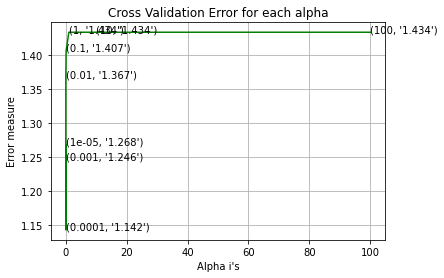

For values of best alpha =  0.0001 The train log loss is: 0.3599723744435245
For values of best alpha =  0.0001 The cross validation log loss is: 1.1422985755238113
For values of best alpha =  0.0001 The test log loss is: 1.147872358458191


In [135]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_task2, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_task2, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_task2)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_task2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task2, train_y)

predict_y = sig_clf.predict_proba(train_x_task2)
tr_log_loss_svm_task2 = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",tr_log_loss_svm_task2)


predict_y = sig_clf.predict_proba(cv_x_task2)
cv_log_loss_svm_task2 = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",cv_log_loss_svm_task2)

predict_y = sig_clf.predict_proba(test_x_task2)
te_log_loss_svm_task2 = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", te_log_loss_svm_task2)

Model is being overfit, so it's not helpful

#### Testing model using best hyp. param

Log Loss : 1.147872358458191
Number of missclassified point : 0.40150375939849625
-------------------- Confusion matrix --------------------


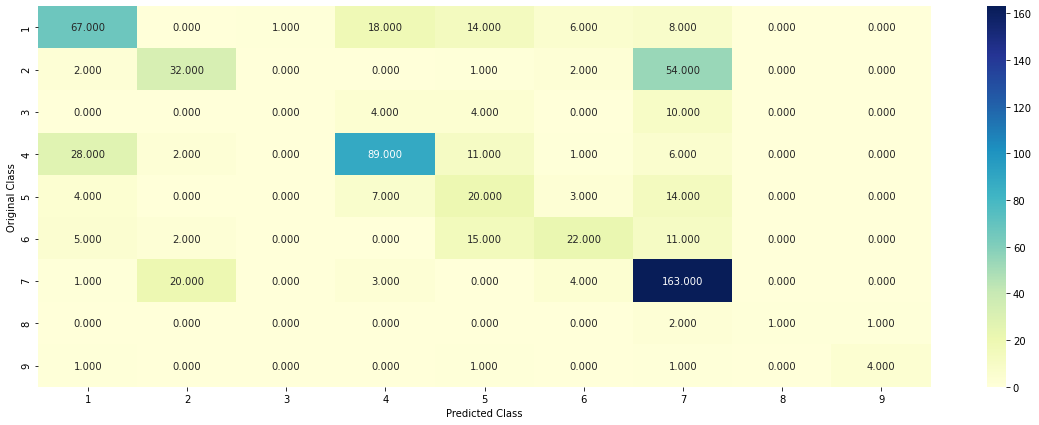

-------------------- Precision matrix (Columm Sum=1) --------------------


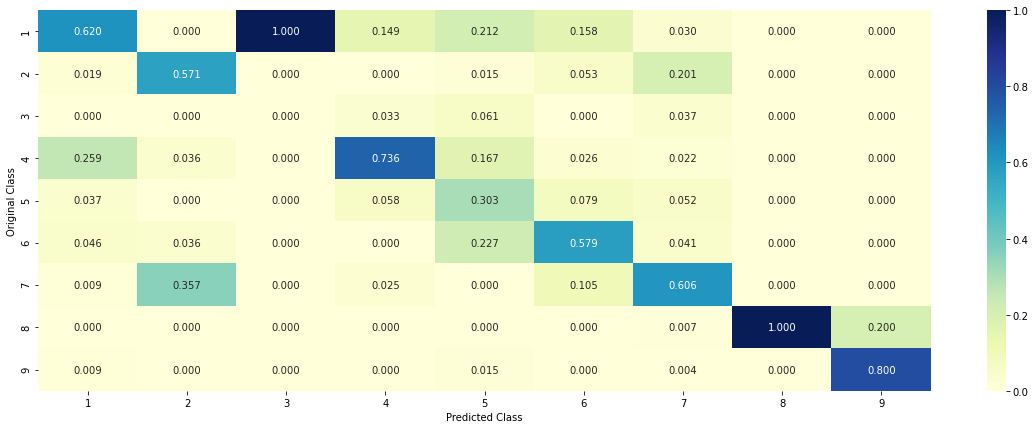

-------------------- Recall matrix (Row sum=1) --------------------


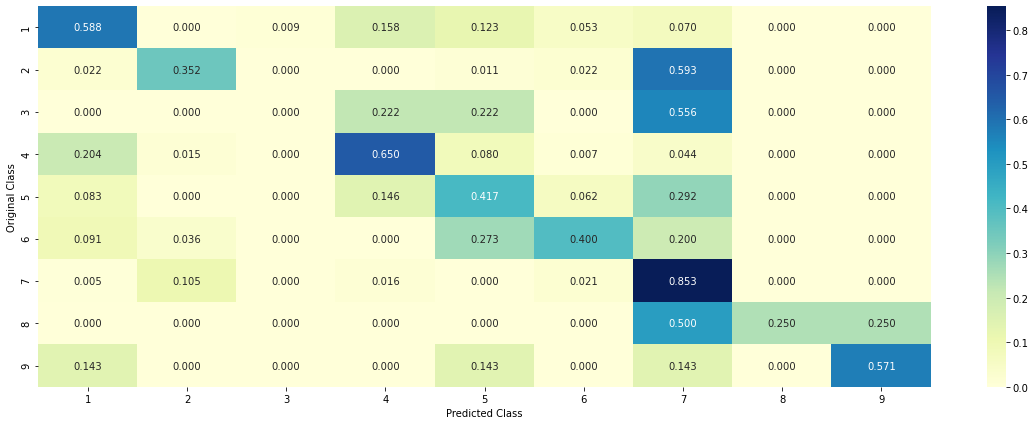

In [136]:
clf = SGDClassifier(class_weight = 'balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_task2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task2, train_y)
sig_clf_probs = sig_clf.predict_proba(test_x_task2)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
log_loss_svm_task2 = log_loss(test_y, sig_clf_probs)
print("Log Loss :",log_loss_svm_task2)

mis_svm_task2 = np.count_nonzero((sig_clf.predict(test_x_task2)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_svm_task2)
plot_confusion_matrix(test_y, sig_clf.predict(test_x_task2.toarray()))

### Random Forest

#### Hyp. Parama Tuning

In [137]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_task2, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_task2, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_task2)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 


best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_task2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task2, train_y)

predict_y = sig_clf.predict_proba(train_x_task2)
tr_log_loss_rf_task2 = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",tr_log_loss_rf_task2)


predict_y = sig_clf.predict_proba(cv_x_task2)
cv_log_loss_rf_task2 = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",cv_log_loss_rf_task2)

predict_y = sig_clf.predict_proba(test_x_task2)
te_log_loss_rf_task2 = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:", te_log_loss_rf_task2)

for n_estimators = 100 and max depth =  5
Log Loss : 1.2806463950932876
for n_estimators = 100 and max depth =  10
Log Loss : 1.2506734098892365
for n_estimators = 200 and max depth =  5
Log Loss : 1.265197377305875
for n_estimators = 200 and max depth =  10
Log Loss : 1.245136730152875
for n_estimators = 500 and max depth =  5
Log Loss : 1.2610744497513735
for n_estimators = 500 and max depth =  10
Log Loss : 1.247731541865324
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2601995692929278
for n_estimators = 1000 and max depth =  10
Log Loss : 1.2473685274631812
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2579943895280363
for n_estimators = 2000 and max depth =  10
Log Loss : 1.2468454244235718
For values of best estimator =  200 The train log loss is: 0.9816049981739224
For values of best estimator =  200 The cross validation log loss is: 1.2451367301528753
For values of best estimator =  200 The test log loss is: 1.25069494992044


#### Testing model using best hyp. params

Log Loss : 1.25069494992044
Number of missclassified point : 0.4255639097744361
-------------------- Confusion matrix --------------------


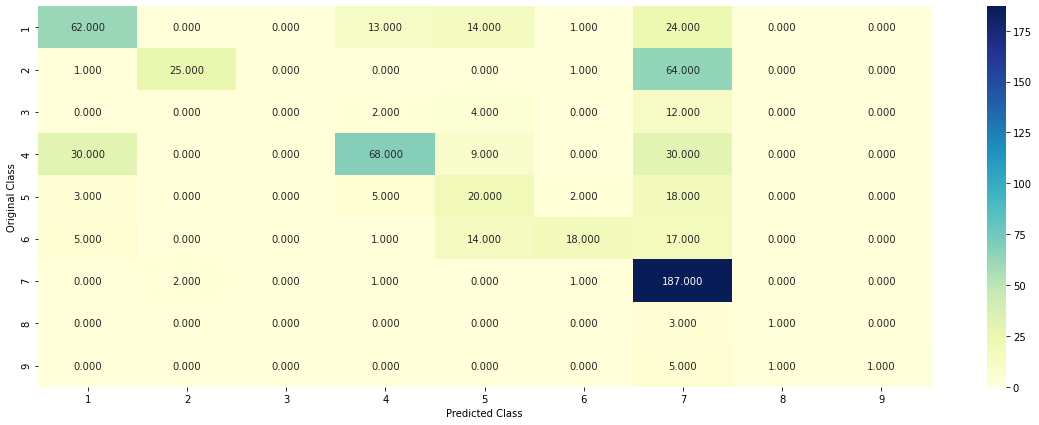

-------------------- Precision matrix (Columm Sum=1) --------------------


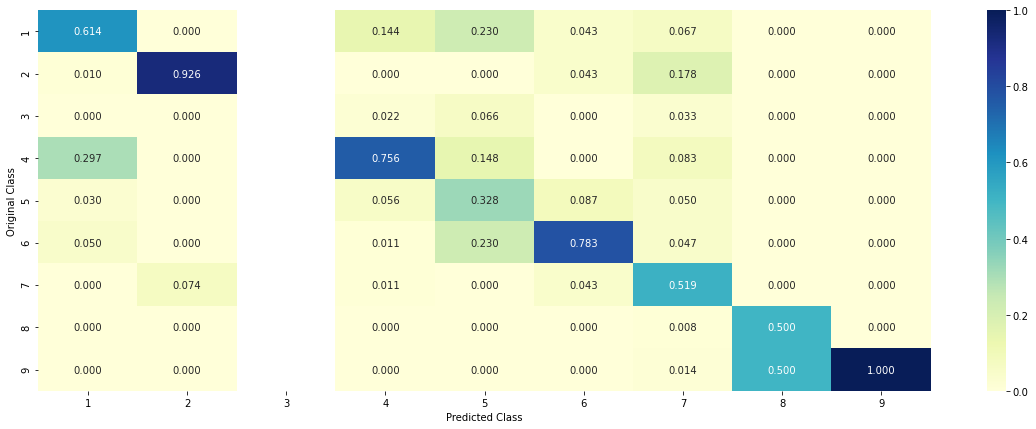

-------------------- Recall matrix (Row sum=1) --------------------


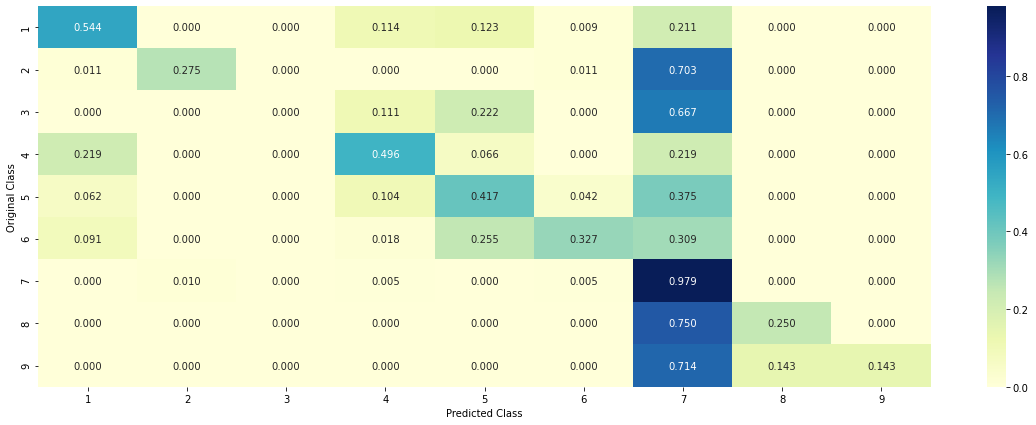

In [138]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_task2, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task2, train_y)
sig_clf_probs = sig_clf.predict_proba(test_x_task2)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
log_loss_rf_task2 = log_loss(test_y, sig_clf_probs)
print("Log Loss :",log_loss_rf_task2)

mis_rf_task2 = np.count_nonzero((sig_clf.predict(test_x_task2)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_rf_task2)
plot_confusion_matrix(test_y, sig_clf.predict(test_x_task2.toarray()))

### Stacking Classifier

#### Hyp. Param. Tuning

In [139]:
clf1 = SGDClassifier(alpha=0.0001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_task2, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.0001, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_task2, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=1)
clf3.fit(train_x_task2, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_task2, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_task2))))
sig_clf2.fit(train_x_task2, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_task2))))
sig_clf3.fit(train_x_task2, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_task2))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_task2, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_task2))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_task2))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.10
Support vector machines : Log Loss: 1.15
Naive Bayes : Log Loss: 1.17
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 1.810
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.669
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.307
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.249
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.457
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.760


#### Testing model using best hyp. param

Log loss (train) on the stacking classifier : 0.2064124886569233
Log loss (CV) on the stacking classifier : 1.2491970646324857
Log loss (test) on the stacking classifier : 1.2317165481611432
Number of missclassified point : 0.4045112781954887
-------------------- Confusion matrix --------------------


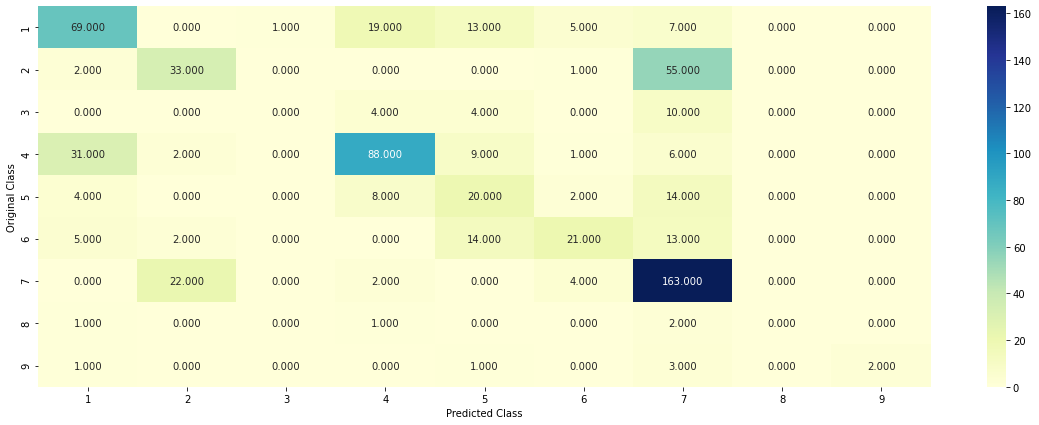

-------------------- Precision matrix (Columm Sum=1) --------------------


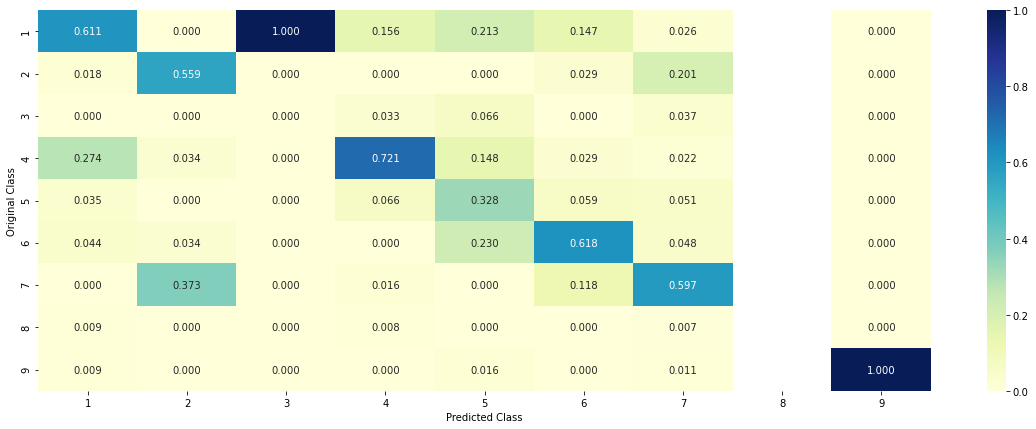

-------------------- Recall matrix (Row sum=1) --------------------


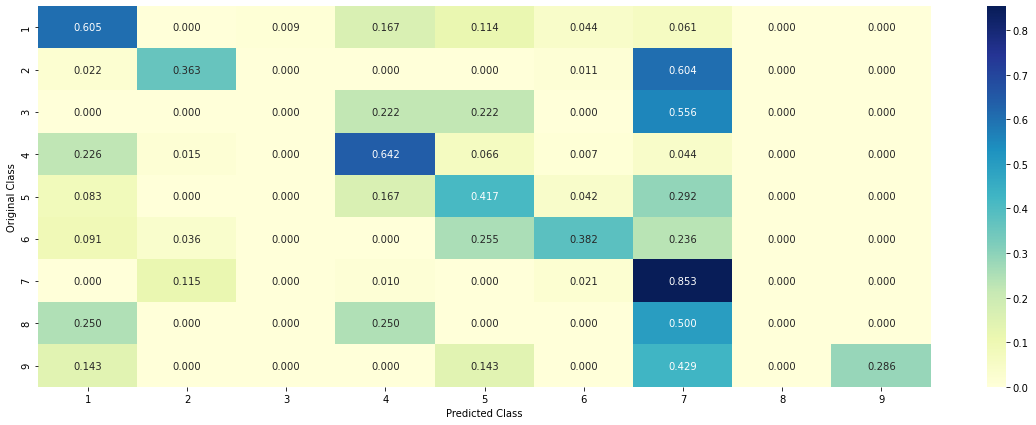

In [140]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_task2, train_y)

tr_log_loss_sclf_task2 = log_loss(train_y, sclf.predict_proba(train_x_task2))
print("Log loss (train) on the stacking classifier :",tr_log_loss_sclf_task2)

cv_log_loss_sclf_task2 = log_loss(cv_y, sclf.predict_proba(cv_x_task2))
print("Log loss (CV) on the stacking classifier :",cv_log_loss_sclf_task2)


te_log_loss_sclf_task2 = log_loss(test_y, sclf.predict_proba(test_x_task2))
print("Log loss (test) on the stacking classifier :",te_log_loss_sclf_task2)

mis_sclf_task2 = np.count_nonzero((sclf.predict(test_x_task2)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_sclf_task2)
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_task2))

In [146]:
y = PrettyTable()

y.field_names = ['Text Data Encoding', 'Model', 'train_log_Loss', 'cv_log_Loss', 'test_log_Loss', 'Misclassified Pnts']

y.add_row(['TFIDF(top-1k feat.)', 'NB', tr_log_loss_nb_task2, cv_log_loss_nb_task2, te_log_loss_nb_task2, mis_nb_task2])
y.add_row(['TFIDF(top-1k feat.)', 'LR(Balanced)', tr_log_loss_lr_task2, cv_log_loss_lr_task2, te_log_loss_lr_task2, mis_lr_task2])
y.add_row(['TFIDF(top-1k feat.)', 'LR', tr_log_loss_lr_task2_2, cv_log_loss_lr_task2_2, te_log_loss_lr_task2_2, mis_lr_task2_2])
y.add_row(['TFIDF(top-1k feat.)', 'Lr. SVM(Balanced)', tr_log_loss_svm_task2, cv_log_loss_svm_task2, te_log_loss_svm_task2, mis_svm_task2])
y.add_row(['TFIDF(top-1k feat.)', 'RF', tr_log_loss_rf_task2, cv_log_loss_rf_task2, te_log_loss_rf_task2, mis_rf_task2])
y.add_row(['TFIDF(top-1k feat.)', 'Stack. Class.', tr_log_loss_sclf_task2, cv_log_loss_sclf_task2, te_log_loss_sclf_task2, mis_sclf_task2])

print(y)

+---------------------+-------------------+---------------------+--------------------+--------------------+---------------------+
|  Text Data Encoding |       Model       |    train_log_Loss   |    cv_log_Loss     |   test_log_Loss    |  Misclassified Pnts |
+---------------------+-------------------+---------------------+--------------------+--------------------+---------------------+
| TFIDF(top-1k feat.) |         NB        |  0.6499586512788597 | 1.1749886152626303 | 1.1792737740242152 |  0.4105263157894737 |
| TFIDF(top-1k feat.) |    LR(Balanced)   |  0.4261510204036479 | 1.0961125017464335 | 1.0931963697603593 |  0.4195488721804511 |
| TFIDF(top-1k feat.) |         LR        | 0.41676710813248746 | 1.0994473933913906 | 1.0941734968961059 |  0.3954887218045113 |
| TFIDF(top-1k feat.) | Lr. SVM(Balanced) |  0.3599723744435245 | 1.1422985755238113 | 1.147872358458191  | 0.40150375939849625 |
| TFIDF(top-1k feat.) |         RF        |  0.9816049981739224 | 1.2451367301528753 |  1.

1. Results are not better than above, where we used all features using tfidf encoding 

# TASK - 3

In [149]:
vectorizer = CountVectorizer(min_df = 3, ngram_range = (1,2))

train_text_bow_task3 = vectorizer.fit_transform(train_df['TEXT'])

cv_text_bow_task3 = vectorizer.transform(cv_df['TEXT'])
test_text_bow_task3 = vectorizer.transform(test_df['TEXT'])

print("Shape of matrix after ohe of train data using BOW : ", train_text_bow_task3.shape)
print("Shape of matrix after ohe of cv data using BOW : ", cv_text_bow_task3.shape)
print("Shape of matrix after ohe of test data using BOW : ", test_text_bow_task3.shape)

Shape of matrix after ohe of train data using BOW :  (2124, 748410)
Shape of matrix after ohe of cv data using BOW :  (532, 748410)
Shape of matrix after ohe of test data using BOW :  (665, 748410)


#### Preparing Data for models

In [150]:
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_task3 = hstack((train_gene_var_onehotCoding, train_text_bow_task3)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_task3 = hstack((test_gene_var_onehotCoding, test_text_bow_task3)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_task3 = hstack((cv_gene_var_onehotCoding, cv_text_bow_task3)).tocsr()
cv_y = np.array(list(cv_df['Class']))

print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_task3.shape)
print("(number of data points * number of features) in test data = ", test_x_task3.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_task3.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 750611)
(number of data points * number of features) in test data =  (665, 750611)
(number of data points * number of features) in cross validation data = (532, 750611)


### Logistic Regression (Balanced Data)

#### Hyp. Parameter Tuning

for alpha = 1e-06
Log Loss : 1.8308894335840866
for alpha = 1e-05
Log Loss : 1.8308894335840866
for alpha = 0.0001
Log Loss : 1.8308894335840866
for alpha = 0.001
Log Loss : 1.2967317171430004
for alpha = 0.01
Log Loss : 1.2798321229503036
for alpha = 0.1
Log Loss : 1.2550652361238692
for alpha = 1
Log Loss : 1.1953201263784703
for alpha = 10
Log Loss : 1.2072651227134814
for alpha = 100
Log Loss : 1.341877727488599


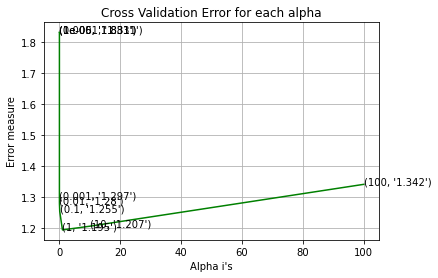

For values of best alpha =  1 The train log loss is: 0.8004250561402784
For values of best alpha =  1 The cross validation log loss is: 1.1953201263784703
For values of best alpha =  1 The test log loss is: 1.2106793263233764


In [152]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_task3, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_task3, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_task3)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task3, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task3, train_y)

predict_y = sig_clf.predict_proba(train_x_task3)
tr_log_loss_lr_task3 = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",tr_log_loss_lr_task3)


predict_y = sig_clf.predict_proba(cv_x_task3)
cv_log_loss_lr_task3 = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",cv_log_loss_lr_task3)

predict_y = sig_clf.predict_proba(test_x_task3)
te_log_loss_lr_task3 = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", te_log_loss_lr_task3)

#### Testing model using best hyp-param

Log Loss : 1.7865690454415373
Number of missclassified point : 0.3954887218045113
-------------------- Confusion matrix --------------------


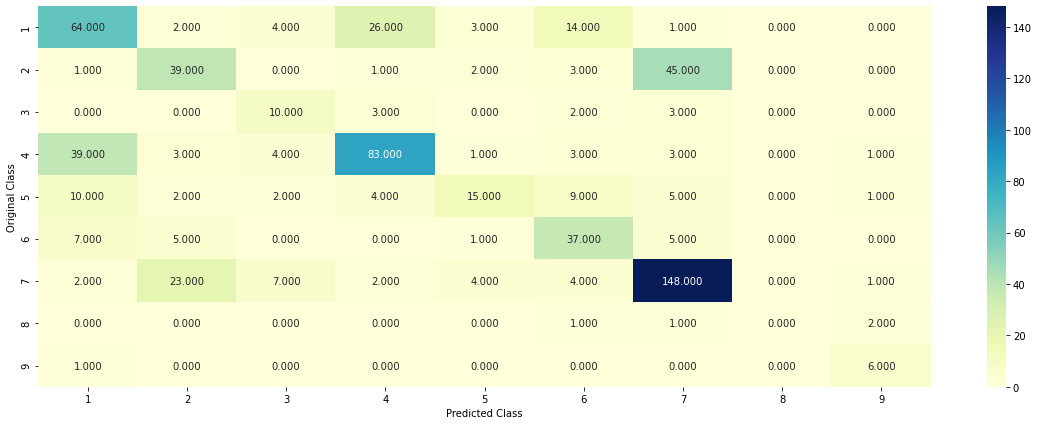

-------------------- Precision matrix (Columm Sum=1) --------------------


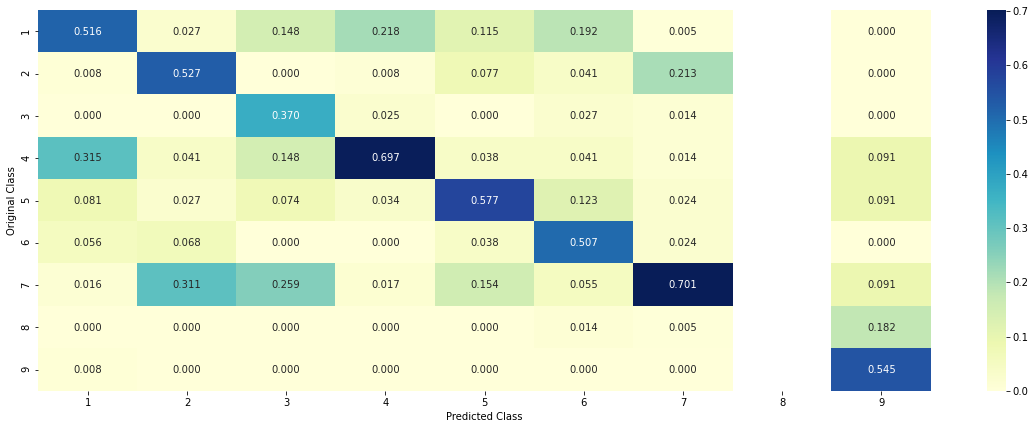

-------------------- Recall matrix (Row sum=1) --------------------


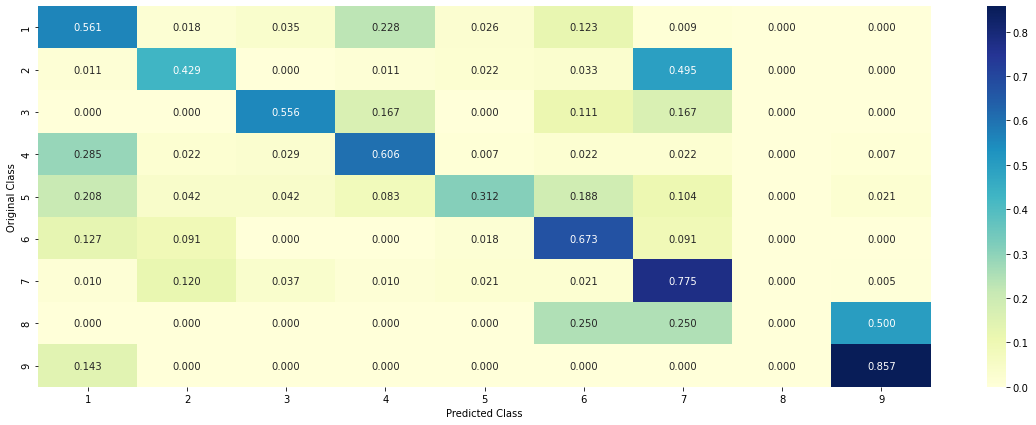

In [153]:

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task3, train_y)
clf_probs = clf.predict_proba(test_x_task3)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
log_loss_lr_task3 = log_loss(test_y, clf_probs)
print("Log Loss :",log_loss_lr_task3)

mis_lr_task3 = np.count_nonzero((clf.predict(test_x_task3)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_lr_task3)
plot_confusion_matrix(test_y, clf.predict(test_x_task3.toarray()))

### Logistic Regression (Without Class Balancing)

#### Hyp-Param Tuning

for alpha = 1e-06
Log Loss : 1.8308894335840866
for alpha = 1e-05
Log Loss : 1.8308894335840866
for alpha = 0.0001
Log Loss : 1.8308894335840866
for alpha = 0.001
Log Loss : 1.2747731013695056
for alpha = 0.01
Log Loss : 1.2776304644263912
for alpha = 0.1
Log Loss : 1.2773698543825187
for alpha = 1
Log Loss : 1.1956840179885992


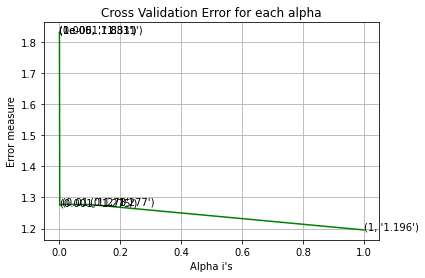

For values of best alpha =  1 The train log loss is: 0.7859098621296755
For values of best alpha =  1 The cross validation log loss is: 1.1956840179885992
For values of best alpha =  1 The test log loss is: 1.2116711575107988


In [154]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_task3, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_task3, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_task3)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task3, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task3, train_y)

predict_y = sig_clf.predict_proba(train_x_task3)
tr_log_loss_lr_task3_2 = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",tr_log_loss_lr_task3_2)


predict_y = sig_clf.predict_proba(cv_x_task3)
cv_log_loss_lr_task3_2 = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",cv_log_loss_lr_task3_2)

predict_y = sig_clf.predict_proba(test_x_task3)
te_log_loss_lr_task3_2 = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", te_log_loss_lr_task3_2)

#### Testing model using best parameter

Log Loss : 1.5909364629111662
Number of missclassified point : 0.38646616541353385
-------------------- Confusion matrix --------------------


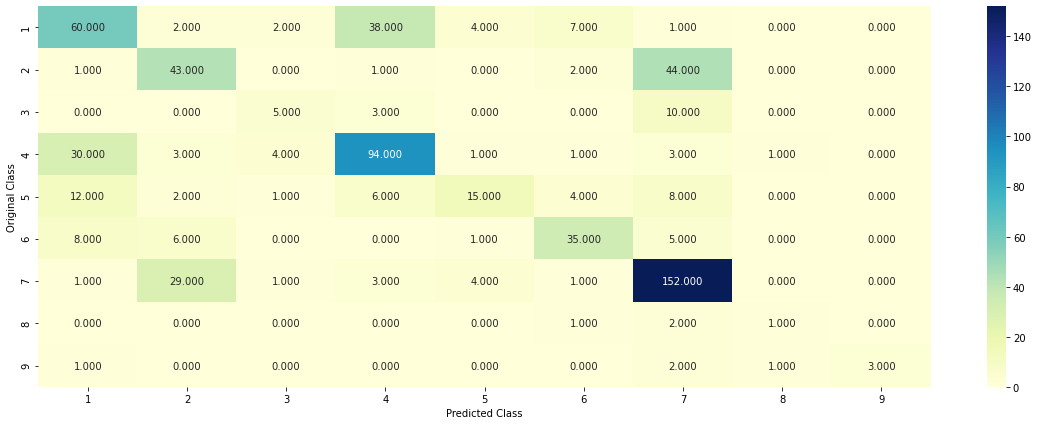

-------------------- Precision matrix (Columm Sum=1) --------------------


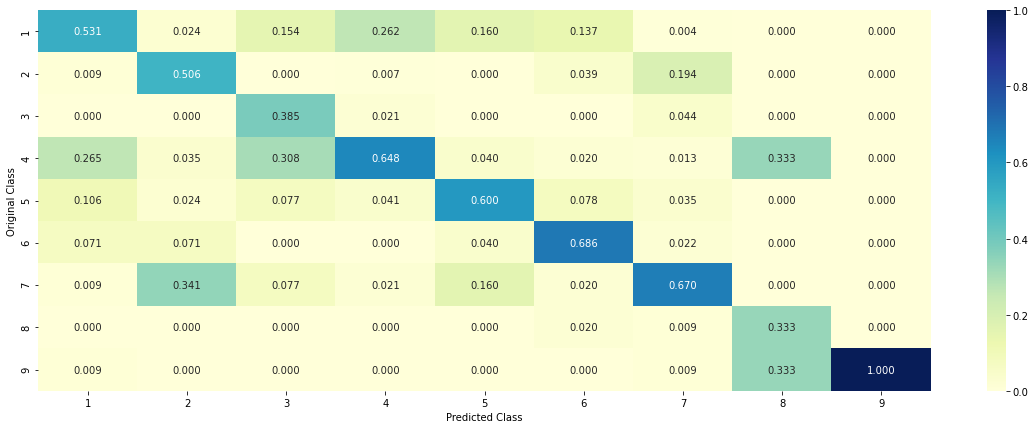

-------------------- Recall matrix (Row sum=1) --------------------


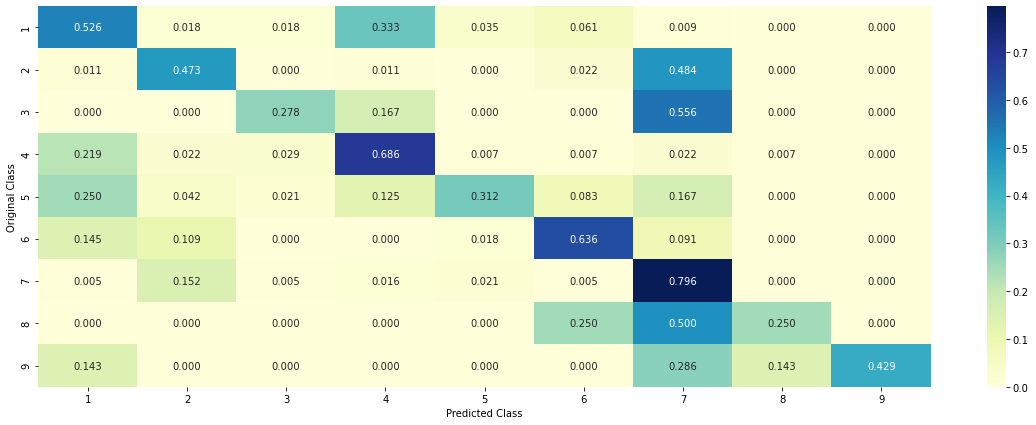

In [158]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task3, train_y)
clf_probs = clf.predict_proba(test_x_task3)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
log_loss_lr_task3_2 = log_loss(test_y, clf_probs)
print("Log Loss :",log_loss_lr_task3_2)

mis_lr_task3_2 = np.count_nonzero((clf.predict(test_x_task3)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_lr_task3_2)
plot_confusion_matrix(test_y, clf.predict(test_x_task3.toarray()))

In [159]:
z = PrettyTable()

z.field_names = ['Text Data Encoding', 'Model', 'train_log_Loss', 'cv_log_Loss', 'test_log_Loss', 'Misclassified Pnts']

z.add_row(['BOW(Uni & Bi-Grams)', 'LR(Balanced)', tr_log_loss_lr_task3, cv_log_loss_lr_task3, te_log_loss_lr_task3, mis_lr_task3])
z.add_row(['BOW(Uni & Bi-Grams)', 'LR', tr_log_loss_lr_task3_2, cv_log_loss_lr_task3_2, te_log_loss_lr_task3_2, mis_lr_task3_2])

print(z)

+---------------------+--------------+--------------------+--------------------+--------------------+---------------------+
|  Text Data Encoding |    Model     |   train_log_Loss   |    cv_log_Loss     |   test_log_Loss    |  Misclassified Pnts |
+---------------------+--------------+--------------------+--------------------+--------------------+---------------------+
| BOW(Uni & Bi-Grams) | LR(Balanced) | 0.8004250561402784 | 1.1953201263784703 | 1.2106793263233764 |  0.3954887218045113 |
| BOW(Uni & Bi-Grams) |      LR      | 0.7859098621296755 | 1.1956840179885992 | 1.2116711575107988 | 0.38646616541353385 |
+---------------------+--------------+--------------------+--------------------+--------------------+---------------------+


# TASK - 4
So, here we need to do feature engineering

In [184]:
train_df.head()

ID   Gene              Variation  Class  \
111    111   MSH6                  V509A      5   
1379  1379  FGFR1  FGFR1OP1-FGFR1_Fusion      7   
2160  2160   PTEN                  T401I      4   
1457  1457  FGFR2                  T730S      5   
2404  2404    NF1                 R2450*      1   

                                                   TEXT  
111   identification high risk disease causing const...  
1379  fop fibroblast growth factor receptor 1 fgfr1 ...  
2160  tumor suppressor gene pten frequently mutated ...  
1457  discovery oncogenic driver mutations subsequen...  
2404  cancer therapy arguably entered transformation...

#### Word Count in Text Data

In [285]:
def word_count(df, column, new_col):
    
    words = []
    for text in df[column].values:
        words.append(len(text.split()))
    
    df[new_col] = words     

In [185]:
word_count(train_df, column = "TEXT", new_col = "word_cnt" )

train_df.head()

ID   Gene              Variation  Class  \
111    111   MSH6                  V509A      5   
1379  1379  FGFR1  FGFR1OP1-FGFR1_Fusion      7   
2160  2160   PTEN                  T401I      4   
1457  1457  FGFR2                  T730S      5   
2404  2404    NF1                 R2450*      1   

                                                   TEXT  word_cnt  
111   identification high risk disease causing const...      3794  
1379  fop fibroblast growth factor receptor 1 fgfr1 ...     14995  
2160  tumor suppressor gene pten frequently mutated ...      3000  
1457  discovery oncogenic driver mutations subsequen...      3018  
2404  cancer therapy arguably entered transformation...      4482

#### Letter Count in Text Data

In [286]:
def letter_count(df, column, new_col):
    
    letters = []
    for text in df[column].values:
        
        text = text.split()
        text = ''.join(text)
        
        letters.append(len(text))
    
    df[new_col] = letters  

In [196]:
letter_count(train_df, column = 'TEXT', new_col = "let_cnt")
train_df.head()

ID   Gene              Variation  Class  \
111    111   MSH6                  V509A      5   
1379  1379  FGFR1  FGFR1OP1-FGFR1_Fusion      7   
2160  2160   PTEN                  T401I      4   
1457  1457  FGFR2                  T730S      5   
2404  2404    NF1                 R2450*      1   

                                                   TEXT  word_cnt  let_cnt  
111   identification high risk disease causing const...      3794    27936  
1379  fop fibroblast growth factor receptor 1 fgfr1 ...     14995    91639  
2160  tumor suppressor gene pten frequently mutated ...      3000    17702  
1457  discovery oncogenic driver mutations subsequen...      3018    19466  
2404  cancer therapy arguably entered transformation...      4482    28614

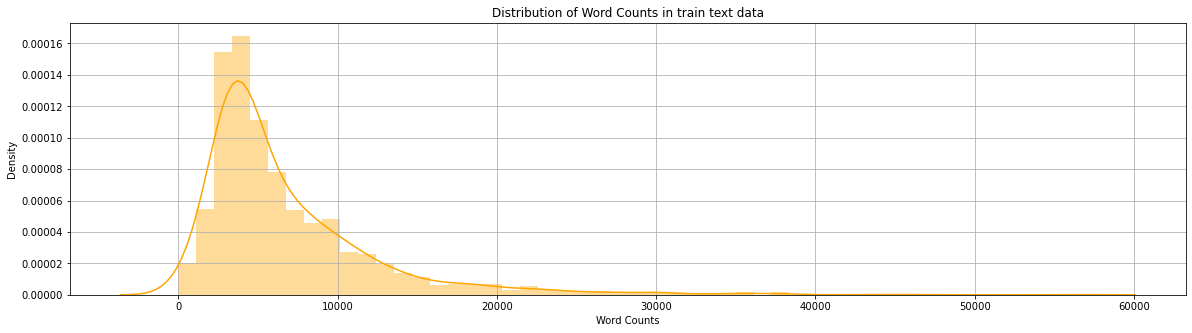

In [219]:
plt.figure(figsize = (20,5))
sns.distplot(train_df.word_cnt, color = 'orange')
plt.xlabel('Word Counts')
plt.title('Distribution of Word Counts in train text data')
plt.grid()
plt.show()

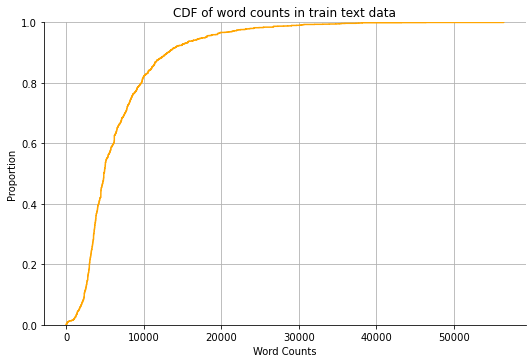

In [218]:
sns.displot(train_df.word_cnt, color = 'orange', kind = 'ecdf', aspect = 1.5)
plt.xlabel('Word Counts')
plt.title('CDF of word counts in train text data')
plt.grid()
plt.show()

From above both plots we can say that 80% data contains 10000 words in text. So, we will create a new feature having words greater than 10000 and less than 10000 words.

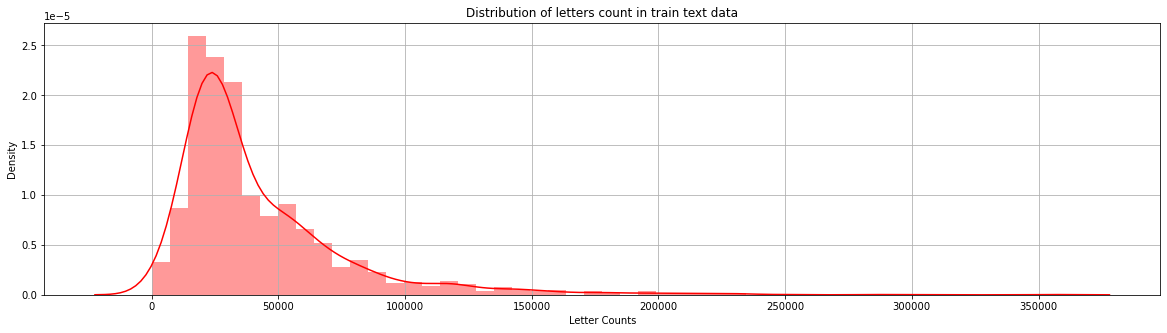

In [220]:
plt.figure(figsize = (20,5))
sns.distplot(train_df.let_cnt, color = 'red')
plt.title('Distribution of letters count in train text data')
plt.xlabel('Letter Counts')
plt.grid()
plt.show()

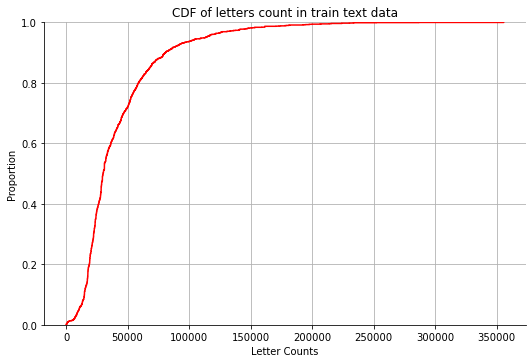

In [221]:
sns.displot(train_df.let_cnt, color = 'red', kind = 'ecdf', aspect = 1.5)
plt.xlabel('Letter Counts')
plt.title('CDF of letters count in train text data')
plt.grid()
plt.show()

Looking at above plots of letters count, we'll data into two categories that is less than and more than 50000 letters. 

In [227]:
#list comprehension, give value 1 if no. of words are less than or equal to 10k else 0 
train_df['word_10k'] = [1 if x <= 10000 else 0 for x in train_df['word_cnt'].values]

#list comprehension, give value 1 if no. of letters are less than or equal to 50k else 0 
train_df['let_10k'] = [1 if x <= 50000 else 0 for x in train_df['let_cnt'].values]

In [229]:
#let's create a feature, calculating avg. no. letters in a word for a given text

train_df['avg_word_len'] = train_df['let_cnt']/train_df['word_cnt']

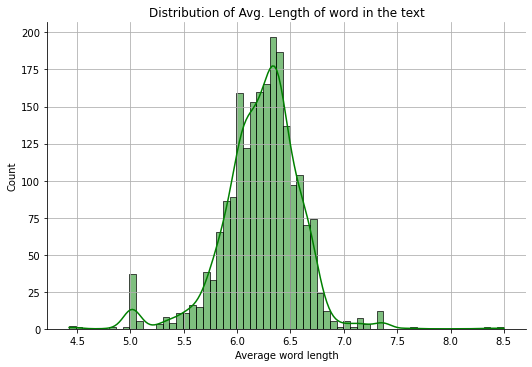

In [233]:
#let's plot a distribution curve for avg. word length 

sns.displot(train_df.avg_word_len, color = 'green', aspect = 1.5, kde = True)
plt.xlabel('Average word length')
plt.title('Distribution of Avg. Length of word in the text')
plt.grid()
plt.show()

It's almost following Normal Distribution

#### Are numbers available in the text

In [287]:
def is_numeric(df, column, new_col):
    
    return_list = []
    for text in df[column].values:
        
        found = False
        for word in text.split():
            if word.isnumeric():
                found = True
                break
                
        if found:       
            return_list.append(1)
            
        else:
            return_list.append(0)
                
    df[new_col] = return_list

In [267]:
#create a column, is_num to get if numbers are in text
is_numeric(train_df, 'TEXT', 'is_num')

In [268]:
train_df.is_num.value_counts()

1    2121
0       3
Name: is_num, dtype: int64

As, we can see almost every text has numbers in it, let's find out total no. of numerics used in text

#### Number of times numericals used in the text

In [288]:
def count_numeric(df, column, new_col):
    
    return_list = []
    for text in df[column].values:
        
        cnt = 0
        for word in text.split():
            if word.isnumeric():
                cnt+=1
                       
        return_list.append(cnt)
                
    df[new_col] = return_list

In [270]:
count_numeric(train_df, 'TEXT', 'cnt_num')

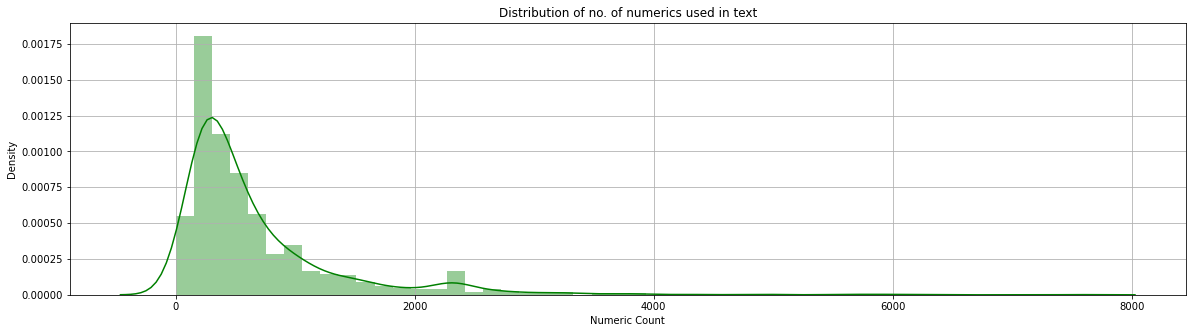

In [273]:
plt.figure(figsize = (20,5))
sns.distplot(train_df.cnt_num, color = 'green')

plt.xlabel('Numeric Count')
plt.title('Distribution of no. of numerics used in text')
plt.grid()
plt.show()

We can see from above plot, most of the texts have less than 1000 numbers. Let's create a feature having more greater than 1000 numbers

#### Are there more than 1000 numbers in text

In [279]:
#list comprehension, give value 1 if no. of numbers are less than or equal to 1k else 0 
train_df['num_1k'] = [1 if x <= 1000 else 0 for x in train_df['cnt_num'].values]

In [289]:
def feature_creation(df):
    
    #to count the no. of words in the text features
    word_count(df, column = "TEXT", new_col = "word_cnt" ) 
    
    #no. of alphabets in the text data of text features
    letter_count(df, column = 'TEXT', new_col = "let_cnt")
    
    #are words less than 10k in the text
    df['word_10k'] = [1 if x <= 10000 else 0 for x in df['word_cnt'].values]
    
    #are letters less than 50k in the text
    df['let_10k'] = [1 if x <= 50000 else 0 for x in df['let_cnt'].values]
    
    #average length of word of the text data
    df['avg_word_len'] = df['let_cnt']/df['word_cnt']
    
    #is numeric data available in the text
    is_numeric(df, 'TEXT', 'is_num')
    
    #count of numerical data in text
    count_numeric(df, 'TEXT', 'cnt_num')
    
    #if there are more than 1000 numbers
    df['num_1k'] = [1 if x <= 1000 else 0 for x in df['cnt_num'].values]
    
    print("All features are added in the dataset")
    

In [284]:
cv_df.head()

ID   Gene         Variation  Class  \
1707  1707  PPM1D      422_605trunc      7   
1960  1960  NUP93  Exon_13_deletion      1   
2726  2726   BRAF             D594G      2   
2247  2247   PTEN             R130A      4   
1736  1736   MSH2             W345*      4   

                                                   TEXT  
1707  ppm1d wip1 negatively regulates dephosphorylat...  
1960  abstract nucleoporins nups essential component...  
2726  braf mutations found subset non small cell lun...  
2247  pten phosphatase tensin homolog phosphatase un...  
1736  identification high risk disease causing const...

In [290]:
#let's create features of cv and test data

feature_creation(cv_df)

feature_creation(test_df)

print('Features of cv_data : ')
print(cv_df.columns)

print('-'*50)

print('Features of test_data : ')
print(test_df.columns)

All features are added in the dataset
All features are added in the dataset
Features of cv_data : 
Index(['ID', 'Gene', 'Variation', 'Class', 'TEXT', 'word_cnt', 'let_cnt',
       'word_10k', 'let_10k', 'avg_word_len', 'is_num', 'cnt_num', 'num_1k'],
      dtype='object')
--------------------------------------------------
Features of test_data : 
Index(['ID', 'Gene', 'Variation', 'Class', 'TEXT', 'word_cnt', 'let_cnt',
       'word_10k', 'let_10k', 'avg_word_len', 'is_num', 'cnt_num', 'num_1k'],
      dtype='object')


### Preprocess the new features created

In [293]:
from sklearn.preprocessing import StandardScaler

def standardize(train_data, cv_data, test_data):
    
    '''Using standard scaler we are going to standardize our data in to having mean = 0 and std. dev. = 1
    
    We will calculate mean and std. dev. of the train data and use these values to standardize cv data and test data to '''
    
    tr = train_data.values.reshape(-1,1)
    cv = cv_data.values.reshape(-1,1)
    te = test_data.values.reshape(-1,1)
    
    stand = StandardScaler()
    tr_std = stand.fit_transform(tr)
    
    cv_std = stand.transform(cv)
    te_std = stand.transform(te)
    
    return tr_std, cv_std, te_std

In [300]:
#standardize word_count
tr_wrd_cnt_stnd, cv_wrd_cnt_stnd, te_wrd_cnt_stnd  = standardize(train_df.word_cnt, cv_df.word_cnt, test_df.word_cnt)

#standardize letter_count
tr_let_cnt_stnd, cv_let_cnt_stnd, te_let_cnt_stnd  = standardize(train_df.let_cnt, cv_df.let_cnt, test_df.let_cnt)

#standardize avg_word_length
tr_wrd_len_cnt_stnd, cv_wrd_len_cnt_stnd, te_wrd_len_cnt_stnd  = standardize(train_df.avg_word_len, cv_df.avg_word_len, test_df.avg_word_len)

#standardize count_num
tr_cnt_num_stnd, cv_cnt_num_stnd, te_cnt_num_stnd  = standardize(train_df.cnt_num, cv_df.cnt_num, test_df.cnt_num)

In [302]:
#as we have seen above, best performing text encoding was tfidf, we'll use that and only apply logistic regression,
#we'll use uni-grams and bi-grams
#only use logistic regression because it was performing well in above situation, also it'll be having high dimension
#for categorical data we'll use response coding

In [303]:
tfidf = TfidfVectorizer(min_df = 3, ngram_range = (1,2))

train_text_tfidf_task4 = tfidf.fit_transform(train_df['TEXT'])

cv_text_tfidf_task4 = tfidf.transform(cv_df['TEXT'])
test_text_tfidf_task4 = tfidf.transform(test_df['TEXT'])

print("Shape of matrix after ohe of train data using tfidf : ", train_text_tfidf_task4.shape)
print("Shape of matrix after ohe of cv data using tfidf : ", cv_text_tfidf_task4.shape)
print("Shape of matrix after ohe of test data using tfidf : ", test_text_tfidf_task4.shape)



Shape of matrix after ohe of train data using tfidf :  (2124, 748410)
Shape of matrix after ohe of cv data using tfidf :  (532, 748410)
Shape of matrix after ohe of test data using tfidf :  (665, 748410)


In [304]:
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_task4 = hstack((train_gene_var_onehotCoding, train_text_tfidf_task4, tr_wrd_cnt_stnd, tr_let_cnt_stnd, tr_wrd_len_cnt_stnd, tr_cnt_num_stnd, train_df.word_10k.values.reshape(-1,1), train_df.let_10k.values.reshape(-1,1), train_df.num_1k.values.reshape(-1,1))).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_task4 = hstack((test_gene_var_onehotCoding, test_text_tfidf_task4, te_wrd_cnt_stnd, te_let_cnt_stnd, te_wrd_len_cnt_stnd, te_cnt_num_stnd, test_df.word_10k.values.reshape(-1,1), test_df.let_10k.values.reshape(-1,1), test_df.num_1k.values.reshape(-1,1))).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_task4 = hstack((cv_gene_var_onehotCoding, cv_text_tfidf_task4, cv_wrd_cnt_stnd, cv_let_cnt_stnd, cv_wrd_len_cnt_stnd, cv_cnt_num_stnd, cv_df.word_10k.values.reshape(-1,1), cv_df.let_10k.values.reshape(-1,1), cv_df.num_1k.values.reshape(-1,1))).tocsr()
cv_y = np.array(list(cv_df['Class']))

print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_task4.shape)
print("(number of data points * number of features) in test data = ", test_x_task4.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_task4.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 750618)
(number of data points * number of features) in test data =  (665, 750618)
(number of data points * number of features) in cross validation data = (532, 750618)


### Logistic Regression (Balanced Data)

#### Hyp. Parameter Tuning

for alpha = 1e-06
Log Loss : 1.0027066902127277
for alpha = 1e-05
Log Loss : 0.9898257798306515
for alpha = 0.0001
Log Loss : 0.9904320309158492
for alpha = 0.001
Log Loss : 1.063291944376427
for alpha = 0.01
Log Loss : 1.3696024293820896
for alpha = 0.1
Log Loss : 1.7562720419049147
for alpha = 1
Log Loss : 1.8158862170537275
for alpha = 10
Log Loss : 1.818164619065564
for alpha = 100
Log Loss : 1.818299907336767


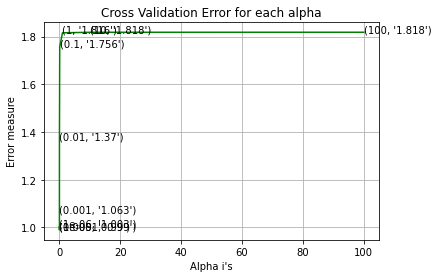

For values of best alpha =  1e-05 The train log loss is: 0.38933028443587603
For values of best alpha =  1e-05 The cross validation log loss is: 0.9898257798306515
For values of best alpha =  1e-05 The test log loss is: 1.0086068781416953


In [305]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_task4, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_task4, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_task4)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task4, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task4, train_y)

predict_y = sig_clf.predict_proba(train_x_task4)
tr_log_loss_lr_task4 = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",tr_log_loss_lr_task4)


predict_y = sig_clf.predict_proba(cv_x_task4)
cv_log_loss_lr_task4 = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",cv_log_loss_lr_task4)

predict_y = sig_clf.predict_proba(test_x_task4)
te_log_loss_lr_task4 = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", te_log_loss_lr_task4)

#### Testing model using best hyp-param

Log Loss : 1.0086068781416953
Number of missclassified point : 0.3609022556390977
-------------------- Confusion matrix --------------------


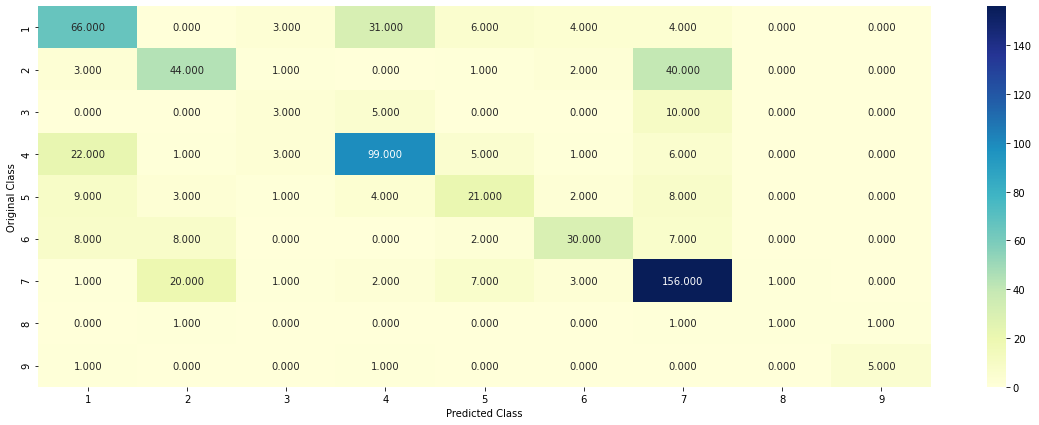

-------------------- Precision matrix (Columm Sum=1) --------------------


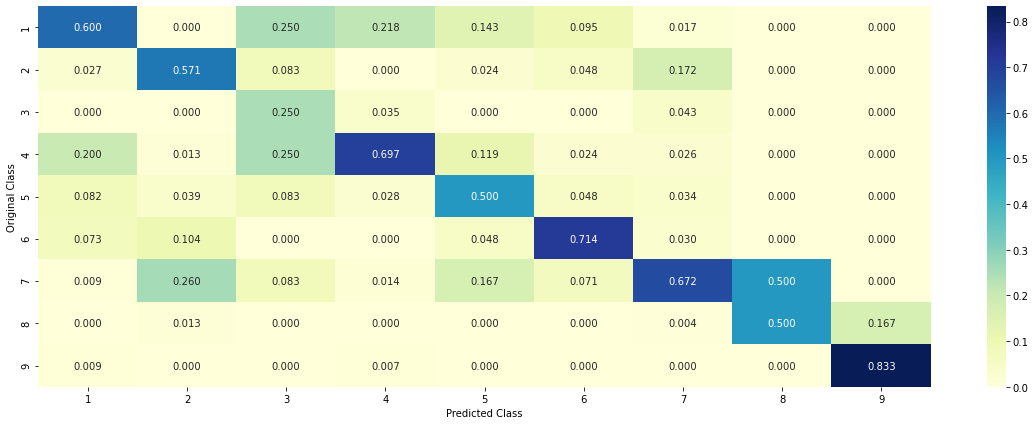

-------------------- Recall matrix (Row sum=1) --------------------


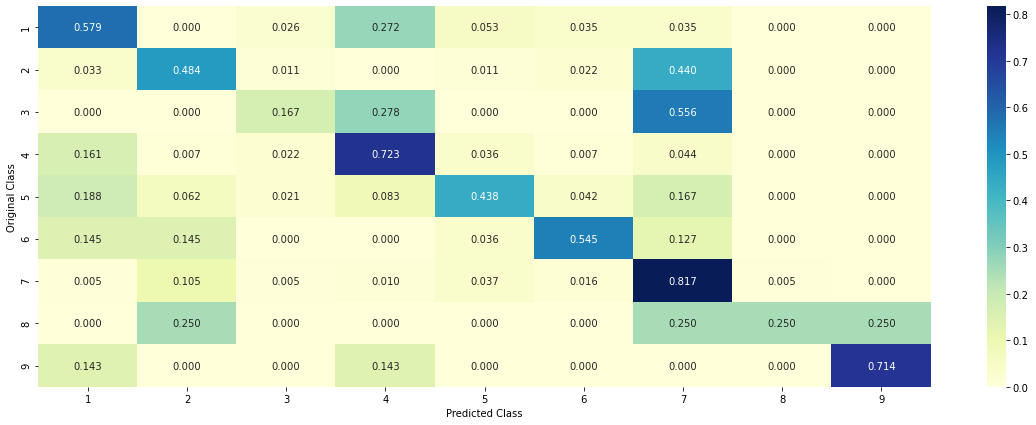

In [311]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task4, train_y)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task4, train_y)

clf_probs = sig_clf.predict_proba(test_x_task4)
log_loss_lr_task4 = log_loss(test_y, clf_probs, labels=clf.classes_, eps=1e-15)
print("Log Loss :",log_loss_lr_task4)

mis_lr_task4 = np.count_nonzero((clf.predict(test_x_task4)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_lr_task4)
plot_confusion_matrix(test_y, clf.predict(test_x_task4.toarray()))

### Logistic Regression (Without Class Balancing)

#### Hyp-Param Tuning

for alpha = 1e-06
Log Loss : 0.9989721208814467
for alpha = 1e-05
Log Loss : 0.9917103151956841
for alpha = 0.0001
Log Loss : 0.9909461077457965
for alpha = 0.001
Log Loss : 1.0752902595212506
for alpha = 0.01
Log Loss : 1.3375483278224016
for alpha = 0.1
Log Loss : 1.7206720621903873
for alpha = 1
Log Loss : 1.8123346248052419


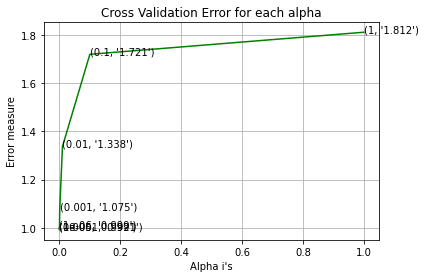

For values of best alpha =  0.0001 The train log loss is: 0.3866104195807289
For values of best alpha =  0.0001 The cross validation log loss is: 0.9909461077457965
For values of best alpha =  0.0001 The test log loss is: 0.9938288741108963


In [312]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_task4, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_task4, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_task4)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task4, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_task4, train_y)

predict_y = sig_clf.predict_proba(train_x_task4)
tr_log_loss_lr_task4_2 = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",tr_log_loss_lr_task4_2)


predict_y = sig_clf.predict_proba(cv_x_task4)
cv_log_loss_lr_task4_2 = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",cv_log_loss_lr_task4_2)

predict_y = sig_clf.predict_proba(test_x_task4)
te_log_loss_lr_task4_2 = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", te_log_loss_lr_task4_2)

#### Testing model using best parameter

Log Loss : 1.004679195035799
Number of missclassified point : 0.35037593984962406
-------------------- Confusion matrix --------------------


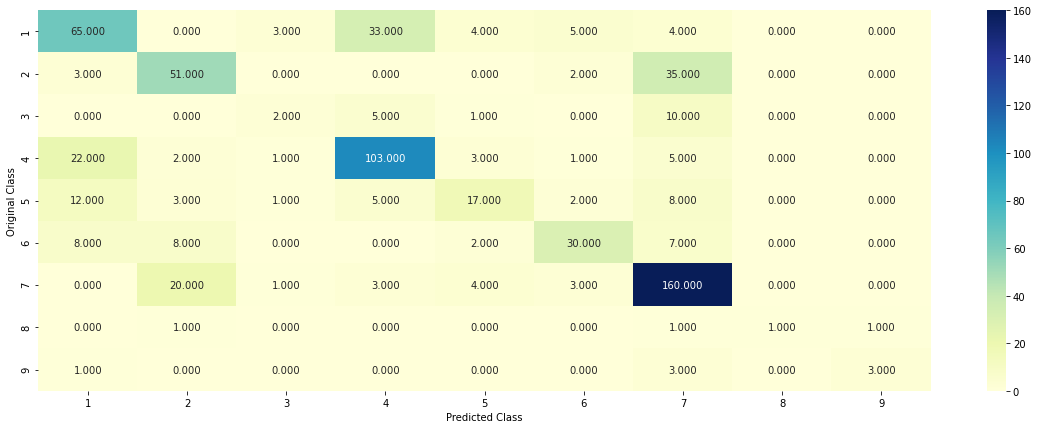

-------------------- Precision matrix (Columm Sum=1) --------------------


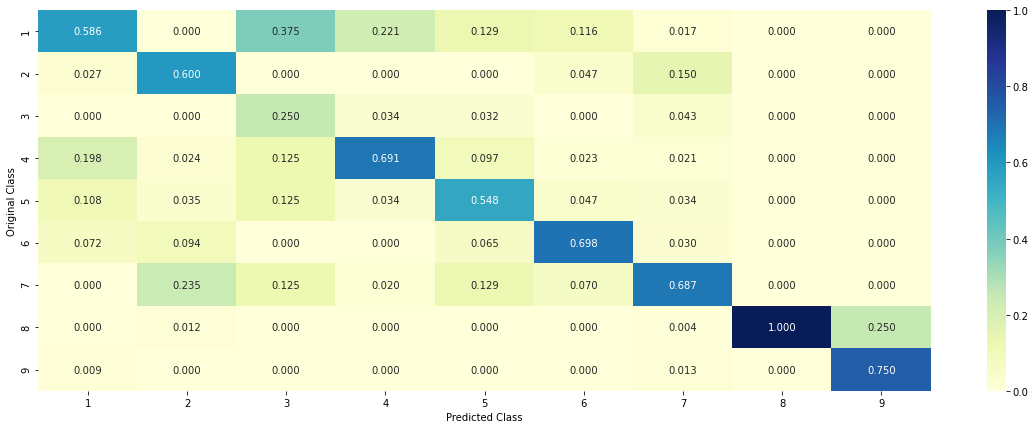

-------------------- Recall matrix (Row sum=1) --------------------


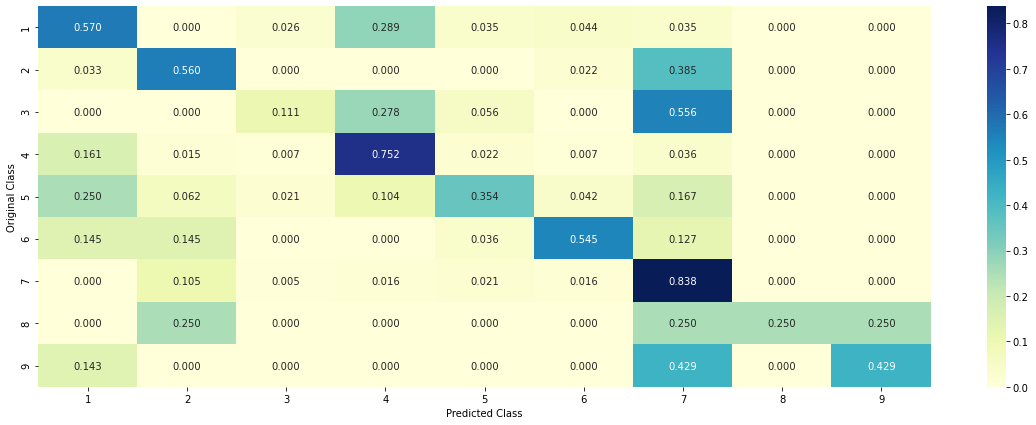

In [313]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_task4, train_y)
clf_probs = clf.predict_proba(test_x_task4)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
log_loss_lr_task4_2 = log_loss(test_y, clf_probs)
print("Log Loss :",log_loss_lr_task4_2)

mis_lr_task4_2 = np.count_nonzero((clf.predict(test_x_task4)- test_y))/test_y.shape[0]
print("Number of missclassified point :", mis_lr_task4_2)
plot_confusion_matrix(test_y, clf.predict(test_x_task4.toarray()))

In [314]:
u = PrettyTable()

u.field_names = ['Text Data Encoding', 'Model', 'train_log_Loss', 'cv_log_Loss', 'test_log_Loss', 'Misclassified Pnts']

u.add_row(['TFIDF(Uni & Bi-Grams)', 'LR(Balanced)', tr_log_loss_lr_task4, cv_log_loss_lr_task4, te_log_loss_lr_task4, mis_lr_task4])
u.add_row(['TFIDF(Uni & Bi-Grams)', 'LR', tr_log_loss_lr_task4_2, cv_log_loss_lr_task4_2, te_log_loss_lr_task4_2, mis_lr_task4_2])

print(u)

+-----------------------+--------------+---------------------+--------------------+--------------------+---------------------+
|   Text Data Encoding  |    Model     |    train_log_Loss   |    cv_log_Loss     |   test_log_Loss    |  Misclassified Pnts |
+-----------------------+--------------+---------------------+--------------------+--------------------+---------------------+
| TFIDF(Uni & Bi-Grams) | LR(Balanced) | 0.38933028443587603 | 0.9898257798306515 | 1.0086068781416953 |  0.3609022556390977 |
| TFIDF(Uni & Bi-Grams) |      LR      |  0.3866104195807289 | 0.9909461077457965 | 0.9938288741108963 | 0.35037593984962406 |
+-----------------------+--------------+---------------------+--------------------+--------------------+---------------------+


In [317]:
#let's print all tables created in different tasks

print('TASK 1')
print('-'*100)
print(x)

print('*'*100)

print('TASK 2')
print('-'*100)
print(y)

print('*'*100)

print('TASK 3')
print('-'*100)
print(z)

print('*'*100)

print('TASK 4')
print('-'*100)
print(u)

TASK 1
----------------------------------------------------------------------------------------------------
+--------------------+------------------------------------+--------------------+----------------------+
| Text Data Encoding |               Model                |      Log_Loss      | Misclassified Points |
+--------------------+------------------------------------+--------------------+----------------------+
|       TFIDF        |            Naive Bayes             | 1.2093740205169945 |  0.3804511278195489  |
|       TFIDF        | Logistic Regression(Balanced Data) | 0.9954507668347623 | 0.37593984962406013  |
|       TFIDF        |        Logistic Regression         | 0.9891278957821513 | 0.35789473684210527  |
|       TFIDF        |     Linear SVM(Balanced Data)      | 1.037090342988821  |  0.3593984962406015  |
|       TFIDF        |           Random Forest            | 1.1045169738442981 |  0.3849624060150376  |
|       TFIDF        |        Stacking Classifier         | 